In [689]:
%load_ext autoreload
%autoreload 2
import os
import glob
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
pd.options.display.max_columns = 999
#pd.options.display.max_rows = 100
import seaborn as sns 
import indicoio
import sys
sys.path.append("../../Code")
import utils
sys.path.append("../../Tools/python-client")
from __future__ import print_function
import time
from pprint import pprint
import settings as s
import images as im
import cognitive as cog
import files as f
import analysis

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [690]:
reviews = pd.read_csv("../2/nr_restrict_reviews.csv", index_col=0)
listings = pd.read_csv("../2/nr_restrict_listings.csv", index_col=0)

In [889]:
len(reviews)

215960

In [890]:
satisfaction = pd.read_csv("../3/satisfaction_scores.csv", index_col=0)

In [891]:
airbnb = pd.read_csv("../6/airbnb_vocab_final.csv", index_col=0)

In [1540]:
formality = pd.read_csv("../9/formality_diff.csv", index_col=0)

In [1541]:
formality

,id,formality_difference,formality_difference_abs
203,22938,13.0,13.0
204,234213,-98.0,98.0
205,264416,-48.0,48.0
206,843520,19.0,19.0
207,993034,5.5,5.5
208,1119849,6.5,6.5
209,1129816,17.0,17.0
210,1292160,13.5,13.5
211,1624497,17.0,17.0
212,4367295,-91.0,91.0


formality['formality_sim'] = formality['formality_difference_abs'].astype(float)*(-1)

In [1539]:
formality_feat = ['formality_difference_abs']

In [894]:
def get_individualism_pairing(x):
    if x <0:
        return 'guest_indi'
    elif x> 0:
        return 'host_indi'
    else:
        return 'no-diff'

airbnb.motivation_pairing.value_counts()

In [1414]:
demo = pd.read_csv("../4/all_demographics.csv", index_col=0)

In [1415]:
profiles = pd.read_csv("../5/language_profiles.csv", index_col=0)

In [1416]:
profiles_feat = ['cosine_similarity', 'tfidf']

In [1417]:
country_cult = pd.read_csv("../7/country_cultural_diff.csv", index_col=0)

In [1418]:
country_cult['power_difference'] = np.abs(country_cult['power_difference'])

In [1419]:
country_cult['individualism_difference'] = np.abs(country_cult['individualism_difference'])

In [1420]:
airbnb_feats = ['social_motivation_abs_diff']#'social_motivation_hg_diff', 

demo['age_difference'] = demo['age_difference_absolute'].astype(float)*(-1)

In [1484]:
demo_feats = ['age_difference_absolute', 'gender_pairing', 'isSameRace']
#'age_difference', 'gender_pairing', 'age-pairing','gender_difference',


In [1485]:
cntry_cult = ['same_country', 'power_difference', 'individualism_difference']
#'eng_in_guest_clangs'

In [1486]:
cntry_diversity = ['h_min_used', 'h_min_cntry', 'diverse_countries']
demo_diversity = ['age_range', 'gender_proportion_gap']

In [1487]:
demo_emotion = ['isSameEmotion', 'smile_distance_absolute']# 'smile_distance', 

In [1488]:
all_feats = demo_emotion + demo_diversity + cntry_diversity + cntry_cult + demo_feats + airbnb_feats +formality_feat

In [1489]:
final_set = reviews[['id','listing_id', 'reviewer_id', 'recipient_id']].join(listings[['id', 'room_type']].set_index('id'), on='listing_id')[['id', 'room_type', 'recipient_id', 'reviewer_id']]

In [1490]:
final_set = final_set.join(demo[['id']+demo_feats+demo_emotion+demo_diversity].set_index('id'), on='id')

In [1491]:
final_set = final_set.join(airbnb[['id']+airbnb_feats].set_index('id'), on='id')

In [1492]:
country_cult =country_cult.rename(columns={'diverse_guests': 'diverse_countries'})

In [1493]:
final_set = final_set.join(country_cult[['id']+cntry_cult+cntry_diversity].set_index('id'), on='id')

In [1494]:
final_set = final_set.join(formality[['id']+formality_feat].set_index('id'), on='id')

In [1495]:
final_set = final_set.join(satisfaction[['id', 'satisfaction', 'relative_satisfaction']].set_index('id'), on='id')

In [1496]:
final_set = final_set.join(final_set.groupby('recipient_id').count().rename(columns={'relative_satisfaction':'num_host_reviews'})[['num_host_reviews']], on='recipient_id')

In [1497]:
final_set = final_set.dropna()

In [1498]:
final_set.columns

Index(['id', 'room_type', 'recipient_id', 'reviewer_id',
       'age_difference_absolute', 'gender_pairing', 'isSameRace',
       'isSameEmotion', 'smile_distance_absolute', 'age_range',
       'gender_proportion_gap', 'social_motivation_abs_diff', 'same_country',
       'power_difference', 'individualism_difference', 'h_min_used',
       'h_min_cntry', 'diverse_countries', 'formality_difference_abs',
       'satisfaction', 'relative_satisfaction', 'num_host_reviews'],
      dtype='object')

In [1499]:
final_set.describe()

,id,recipient_id,reviewer_id,age_difference_absolute,isSameRace,isSameEmotion,smile_distance_absolute,age_range,gender_proportion_gap,social_motivation_abs_diff,same_country,power_difference,individualism_difference,h_min_used,h_min_cntry,diverse_countries,formality_difference_abs,satisfaction,relative_satisfaction,num_host_reviews
count,9.369000e+03,9.369000e+03,9.369000e+03,9369.000000,9369.00000,9369.000000,9369.000000,9369.000000,9369.000000,9369.000000,9369.000000,9369.000000,9369.000000,9369.000000,9369.000000,9369.000000,9369.000000,9369.000000,9369.000000,9369.000000
mean,1.231832e+08,2.284997e+07,4.321153e+07,10.126694,0.70808,0.378055,0.386059,36.396200,0.275684,0.359467,0.567083,5.919522,10.092326,1.330665,0.725157,0.342305,108.073807,0.672656,0.000728,86.417440
std,8.121126e+07,3.446554e+07,4.362126e+07,8.359022,0.45467,0.484927,0.415363,14.581463,0.243499,0.294632,0.495506,11.139580,18.171963,2.295700,1.252038,0.203624,291.796508,0.111185,0.105702,73.986575
min,9.333300e+04,7.989000e+03,4.310000e+02,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.066667,0.000000,0.119021,-0.547461,5.000000
25%,5.066741e+07,2.770788e+06,9.405848e+06,4.000000,0.00000,0.000000,0.000000,26.000000,0.100000,0.099078,0.000000,0.000000,0.000000,0.000000,0.000000,0.195652,10.500000,0.608607,-0.054335,31.000000
50%,1.137566e+08,8.811222e+06,2.762130e+07,8.000000,1.00000,0.000000,0.185000,37.000000,0.220339,0.314570,1.000000,0.000000,0.000000,0.000000,0.000000,0.285714,37.000000,0.706961,0.027337,67.000000
75%,1.977325e+08,2.544023e+07,6.345560e+07,15.000000,1.00000,1.000000,0.885000,47.000000,0.372093,0.500000,1.000000,5.000000,15.000000,2.000000,1.000000,0.428571,103.500000,0.745908,0.071056,121.000000
max,2.725255e+08,1.875685e+08,1.899914e+08,52.000000,1.00000,1.000000,1.000000,69.000000,1.000000,1.000000,1.000000,64.000000,85.000000,14.000000,6.000000,1.000000,4042.000000,0.907517,0.303926,400.000000


In [1500]:
len(final_set.groupby('recipient_id').count())

1347

In [1501]:
len(final_set.groupby('reviewer_id').count())

8787

# Proportion of full vs shared


In [1502]:
final_set.room_type.value_counts()

Entire home/apt    5327
Private room       3947
Shared room          95
Name: room_type, dtype: int64

In [1503]:
shared_set = final_set[final_set.room_type != 'Entire home/apt']

In [1504]:
shared_set = shared_set.drop(['id', 'room_type'], axis=1)

In [1505]:
shared_set[all_feats].describe().T

,count,mean,std,min,25%,50%,75%,max
isSameEmotion,4042.0,0.383968,0.486411,0.000000,0.000000,0.000000,1.000000,1.0
smile_distance_absolute,4042.0,0.379045,0.421153,0.000000,0.000000,0.142000,0.889000,1.0
age_range,4042.0,38.300346,13.778441,0.000000,30.000000,40.000000,48.000000,66.0
gender_proportion_gap,4042.0,0.286376,0.246848,0.000000,0.111111,0.238095,0.375000,1.0
h_min_used,4042.0,1.296141,2.218933,0.000000,0.000000,0.000000,1.000000,7.0
h_min_cntry,4042.0,0.702128,1.158697,0.000000,0.000000,0.000000,1.000000,6.0
diverse_countries,4042.0,0.340704,0.196533,0.105263,0.200000,0.284903,0.416667,1.0
same_country,4042.0,0.527956,0.499280,0.000000,0.000000,1.000000,1.000000,1.0
power_difference,4042.0,6.901534,12.169296,0.000000,0.000000,0.000000,5.000000,64.0
individualism_difference,4042.0,12.245423,20.133362,0.000000,0.000000,0.000000,20.000000,85.0


In [1506]:
full_set = final_set[final_set.room_type == 'Entire home/apt']

In [1507]:
full_set[all_feats].describe().T

,count,mean,std,min,25%,50%,75%,max
isSameEmotion,5327.0,0.373569,0.483796,0.000000,0.000000,0.000000,1.000000,1.0
smile_distance_absolute,5327.0,0.391382,0.410876,0.000000,0.001000,0.216000,0.869500,1.0
age_range,5327.0,34.951380,15.003282,0.000000,24.000000,35.000000,47.000000,69.0
gender_proportion_gap,5327.0,0.267572,0.240633,0.000000,0.090909,0.200000,0.352941,1.0
h_min_used,5327.0,1.356861,2.352147,0.000000,0.000000,0.000000,2.000000,14.0
h_min_cntry,5327.0,0.742632,1.318301,0.000000,0.000000,0.000000,1.000000,6.0
diverse_countries,5327.0,0.343519,0.208854,0.066667,0.181818,0.297297,0.428571,1.0
same_country,5327.0,0.596771,0.490592,0.000000,0.000000,1.000000,1.000000,1.0
power_difference,5327.0,5.174395,10.228180,0.000000,0.000000,0.000000,5.000000,64.0
individualism_difference,5327.0,8.458607,16.342873,0.000000,0.000000,0.000000,11.000000,85.0


In [1508]:
full_set = full_set.drop(['id', 'room_type'], axis=1)

In [1509]:
from sklearn import preprocessing
def get_x_y(data, y_col):
    x = data.values 
    min_max_scaler = preprocessing.MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(x)
    X = pd.DataFrame(x_scaled)
    X.columns = data.columns
    return (X.drop(y_col, axis=1), X[y_col])

# All

# Full

### Satisfaction

full_similarity = full_set[["satisfaction"]+all_feats]

full_similarity['gender_pairing'].value_counts()

full_similarity = analysis.get_dummies(full_similarity, 'gender_pairing')

full_similarity['age-pairing'].value_counts()

full_similarity = analysis.get_dummies(full_similarity, 'age-pairing')

full_similarity['race_pairing'].value_counts()

full_similarity = analysis.get_dummies(full_similarity, 'race_pairing')

full_similarity['emotion_pairing'].value_counts()

full_similarity = analysis.get_dummies(full_similarity, 'emotion_pairing')

full_similarity_X,full_similarity_Y = get_x_y(full_similarity, 'satisfaction')

sns.distplot(full_similarity_Y)
plt.show()

analysis.test_features(full_similarity_X, full_similarity_Y, vif_thresh=10)

### Relative Satisfaction

In [1510]:
full_similarity = full_set[["relative_satisfaction"]+all_feats]

In [1511]:
full_similarity['gender_pairing'].value_counts()

female-female    1417
male-male        1390
male-female      1304
female-male      1216
Name: gender_pairing, dtype: int64

In [1512]:
full_similarity = analysis.get_dummies(full_similarity, 'gender_pairing')

In [1513]:
full_similarity_X,full_similarity_Y = get_x_y(full_similarity, 'relative_satisfaction')

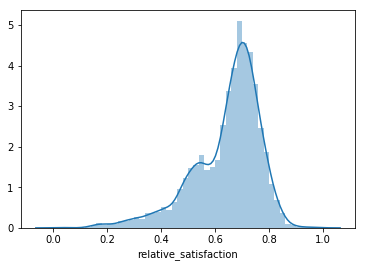

In [1514]:
sns.distplot(full_similarity_Y)
plt.show()

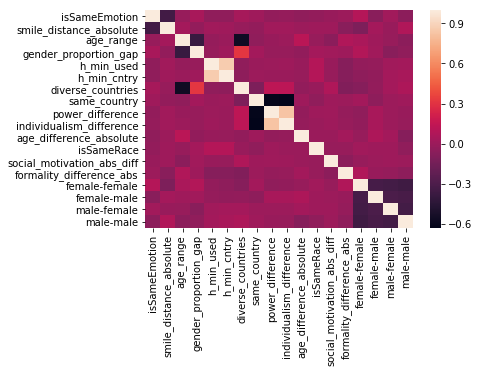

,isSameEmotion,smile_distance_absolute,age_range,gender_proportion_gap,h_min_used,h_min_cntry,diverse_countries,same_country,power_difference,individualism_difference,age_difference_absolute,isSameRace,social_motivation_abs_diff,formality_difference_abs,female-female,female-male,male-female,male-male
isSameEmotion,1,-0.345352,-0.0124226,0.0469546,-0.0439142,-0.0402834,0.0407825,0.0177401,-0.0274728,-0.0217196,-0.0384491,-0.0252033,-0.0120384,0.00635746,0.0945436,-0.0677331,0.024248,-0.0541337
smile_distance_absolute,-0.345352,1,0.0332305,-0.030329,0.0223035,0.0143058,-0.0160022,-0.0305129,0.0211861,0.0249343,0.00366138,0.00825846,0.0124787,-0.0645429,-0.109217,0.0382735,-0.00626672,0.0794494
age_range,-0.0124226,0.0332305,1,-0.38748,-0.0192365,9.81721e-05,-0.563214,-0.0430192,-0.00758323,0.00282084,0.120662,-0.0165535,-0.0590495,0.0791144,0.0569186,0.0149402,-0.0180614,-0.0538669
gender_proportion_gap,0.0469546,-0.030329,-0.38748,1,-0.0158057,0.0133021,0.317618,0.0310801,-0.0180758,-0.0159338,-0.0356904,0.034125,0.0200258,0.00729257,0.0852772,0.024234,-0.0690588,-0.0413528
h_min_used,-0.0439142,0.0223035,-0.0192365,-0.0158057,1,0.861411,-0.0379601,-7.51697e-05,0.00542773,0.00703925,-0.0119484,0.0944409,-0.0109401,-0.0806915,-0.0308295,-0.0222388,0.0244395,0.028347
h_min_cntry,-0.0402834,0.0143058,9.81721e-05,0.0133021,0.861411,1,-0.0454625,0.0026631,-0.00467738,-0.00227673,-0.0128338,0.0924493,-0.0149096,-0.0801041,-0.0461878,-0.035301,0.0333231,0.0475871
diverse_countries,0.0407825,-0.0160022,-0.563214,0.317618,-0.0379601,-0.0454625,1,-0.110404,0.133164,0.125289,-0.0324583,-0.0108174,0.0751301,-0.0965181,-0.0810916,-0.0255567,0.0373252,0.0694755
same_country,0.0177401,-0.0305129,-0.0430192,0.0310801,-7.51697e-05,0.0026631,-0.110404,1,-0.615503,-0.629708,0.00945002,-0.0431729,0.00777712,0.00583422,0.030637,-0.0480257,0.00161132,0.0134967
power_difference,-0.0274728,0.0211861,-0.00758323,-0.0180758,0.00542773,-0.00467738,0.133164,-0.615503,1,0.833649,-0.0270495,0.00936142,0.0155611,-0.0235213,-0.0377234,0.0451726,0.00664215,-0.0117204
individualism_difference,-0.0217196,0.0249343,0.00282084,-0.0159338,0.00703925,-0.00227673,0.125289,-0.629708,0.833649,1,-0.0248195,-0.00301111,0.0108728,-0.0178032,-0.0319215,0.0454157,0.00243068,-0.0136672


                          cols        vif
0                isSameEmotion   1.152072
1      smile_distance_absolute   1.152410
2                    age_range   1.640013
3        gender_proportion_gap   1.240711
4                   h_min_used   3.919980
5                  h_min_cntry   3.931600
6            diverse_countries   1.581252
7                 same_country   1.759905
8             power_difference   3.443861
9     individualism_difference   3.538614
10     age_difference_absolute   1.029866
11                  isSameRace   1.018009
12  social_motivation_abs_diff   1.009437
13    formality_difference_abs   1.031987
14               female-female  10.020190
15                 female-male   8.579859
16                 male-female   9.139905
17                   male-male   9.503664
dropping 'female-female' at index: 14
                          cols       vif
0                isSameEmotion  1.767308
1      smile_distance_absolute  2.128287
2                    age_range  5.609994


In [1517]:
analysis.test_features(full_similarity_X, full_similarity_Y, vif_thresh=4)

# Shared

### Satisfaction

shared_similarity = shared_set[["satisfaction"]+all_feats]

shared_similarity['motivation_pairing'].value_counts()

shared_similarity = analysis.get_dummies(shared_similarity, 'motivation_pairing')

shared_similarity['gender_pairing'].value_counts()

shared_similarity = analysis.get_dummies(shared_similarity, 'gender_pairing')

shared_similarity_X,shared_similarity_Y = get_x_y(shared_similarity, 'satisfaction')

analysis.test_features(shared_similarity_X, shared_similarity_Y, vif_thresh=5)

### Relative Satisfaction

In [1532]:
shared_similarity = shared_set[["relative_satisfaction"]+all_feats]

shared_similarity['motivation_pairing'].value_counts()

shared_similarity = analysis.get_dummies(shared_similarity, 'motivation_pairing')

In [1533]:
shared_similarity['gender_pairing'].value_counts()

female-female    1315
male-male         930
male-female       913
female-male       884
Name: gender_pairing, dtype: int64

In [1534]:
shared_similarity = analysis.get_dummies(shared_similarity, 'gender_pairing')

In [1535]:
shared_similarity_X,shared_similarity_Y = get_x_y(shared_similarity, 'relative_satisfaction')

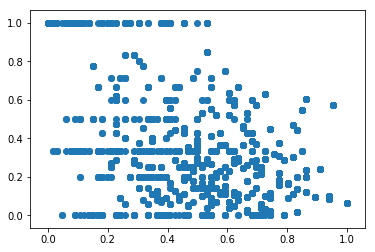

In [1536]:
plt.scatter(shared_similarity_X['age_range'], shared_similarity_X['gender_proportion_gap'])
plt.show()

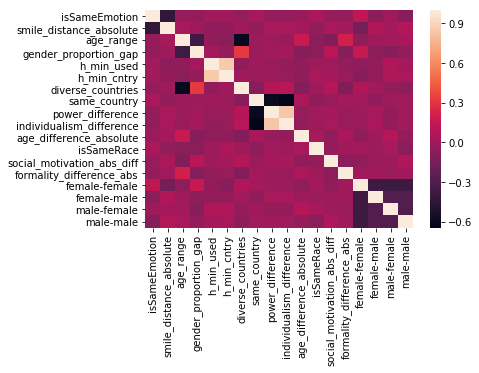

,isSameEmotion,smile_distance_absolute,age_range,gender_proportion_gap,h_min_used,h_min_cntry,diverse_countries,same_country,power_difference,individualism_difference,age_difference_absolute,isSameRace,social_motivation_abs_diff,formality_difference_abs,female-female,female-male,male-female,male-male
isSameEmotion,1,-0.42779,-0.0289165,-0.0326064,0.0154511,0.0146202,-0.0268661,0.0413823,-0.0288958,-0.0338834,-0.00900879,0.047,-0.0255526,-0.0397469,0.130383,-0.0608263,-0.000684997,-0.0847128
smile_distance_absolute,-0.42779,1,0.0360079,0.00831054,-0.0492344,-0.0443988,0.0032904,-0.0339833,0.0371666,0.0387522,0.02277,-0.0350539,0.0519503,0.0151762,-0.149368,0.0671091,0.0223758,0.0781241
age_range,-0.0289165,0.0360079,1,-0.36928,-0.0451853,-0.0753221,-0.60635,-0.00539364,-0.00374199,-0.0193728,0.167852,-0.0737098,-0.107485,0.210255,-0.0557696,0.000629657,0.0182425,0.043336
gender_proportion_gap,-0.0326064,0.00831054,-0.36928,1,0.0246754,-0.0346491,0.31978,-0.00615791,0.0160147,0.0287878,-0.0851821,-0.0779644,0.107748,-0.0885196,0.162603,-0.0579292,-0.0853097,-0.0393463
h_min_used,0.0154511,-0.0492344,-0.0451853,0.0246754,1,0.858115,-0.045134,0.00224176,-0.014096,-0.0342424,-0.0417814,-0.00530805,0.0108762,-0.0357758,-0.0417537,-0.0371697,0.0641667,0.0192318
h_min_cntry,0.0146202,-0.0443988,-0.0753221,-0.0346491,0.858115,1,0.00317677,-0.00399544,-0.00409885,-0.0266734,-0.05629,0.0436081,0.028925,-0.00924,-0.0785341,-0.0297977,0.0663662,0.0507475
diverse_countries,-0.0268661,0.0032904,-0.60635,0.31978,-0.045134,0.00317677,1,-0.0835352,0.0868275,0.0953467,-0.0975813,0.000820143,0.0935351,-0.105471,0.0642682,0.014991,-0.0325169,-0.0539556
same_country,0.0413823,-0.0339833,-0.00539364,-0.00615791,0.00224176,-0.00399544,-0.0835352,1,-0.599849,-0.643308,0.0462371,-0.0493967,-0.0136807,0.0243895,0.0219359,-0.0428164,0.00471185,0.0129527
power_difference,-0.0288958,0.0371666,-0.00374199,0.0160147,-0.014096,-0.00409885,0.0868275,-0.599849,1,0.835615,-0.0244159,0.014408,0.0243481,-0.00935241,-0.00457937,0.0315806,-0.0315618,0.0054383
individualism_difference,-0.0338834,0.0387522,-0.0193728,0.0287878,-0.0342424,-0.0266734,0.0953467,-0.643308,0.835615,1,-0.0322972,0.0048959,0.0364402,-0.0135706,-0.0161519,0.0380864,-0.0329189,0.0132787


                          cols        vif
0                isSameEmotion   1.242243
1      smile_distance_absolute   1.245549
2                    age_range   1.818046
3        gender_proportion_gap   1.256946
4                   h_min_used   3.964331
5                  h_min_cntry   3.993530
6            diverse_countries   1.667339
7                 same_country   1.766525
8             power_difference   3.398845
9     individualism_difference   3.726056
10     age_difference_absolute   1.046568
11                  isSameRace   1.041644
12  social_motivation_abs_diff   1.033352
13    formality_difference_abs   1.057538
14               female-female  14.383185
15                 female-male   9.688610
16                 male-female  10.104853
17                   male-male  10.263872
dropping 'female-female' at index: 14
                          cols       vif
0                isSameEmotion  1.899130
1      smile_distance_absolute  2.195644
2                    age_range  6.617115


In [1538]:
analysis.test_features(shared_similarity_X, shared_similarity_Y, vif_thresh=4)

# Online Presentation

# Full

### Satisfaction

full_emotion = full_set[["satisfaction"]+demo_emotion+formality_feat]

full_emotion_X,full_emotion_Y = get_x_y(full_emotion, 'satisfaction')

analysis.test_features(full_emotion_X, full_emotion_Y, vif_thresh=10)

### Relative Satisfaction

In [1087]:
full_online = full_set[["relative_satisfaction"]+demo_emotion+formality_feat]

In [1088]:
full_online_X,full_online_Y = get_x_y(full_online, 'relative_satisfaction')

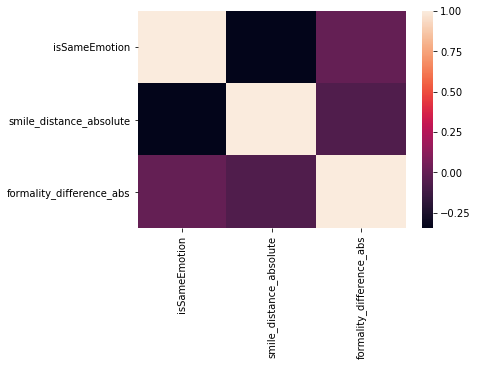

,isSameEmotion,smile_distance_absolute,formality_difference_abs
isSameEmotion,1,-0.345352,0.00635746
smile_distance_absolute,-0.345352,1,-0.0645429
formality_difference_abs,0.00635746,-0.0645429,1


                       cols       vif
0             isSameEmotion  1.115808
1   smile_distance_absolute  1.109032
2  formality_difference_abs  1.146201
Remaining variables:
Index(['isSameEmotion', 'smile_distance_absolute', 'formality_difference_abs'], dtype='object')
                              OLS Regression Results                             
Dep. Variable:     relative_satisfaction   R-squared:                       0.695
Model:                               OLS   Adj. R-squared:                  0.695
Method:                    Least Squares   F-statistic:                     4040.
Date:                   Tue, 11 Sep 2018   Prob (F-statistic):               0.00
Time:                           14:51:01   Log-Likelihood:                -2155.3
No. Observations:                   5327   AIC:                             4317.
Df Residuals:                       5324   BIC:                             4336.
Df Model:                              3                                   

In [1089]:
analysis.test_features(full_online_X, full_online_Y, vif_thresh=10)

# Shared

### Satisfaction

shared_emotion = shared_set[["satisfaction"]+demo_emotion]

shared_emotion_X,shared_emotion_Y = get_x_y(shared_emotion, 'satisfaction')

analysis.test_features(shared_emotion_X, shared_emotion_Y, vif_thresh=10)

### Relative Satisfaction

In [1084]:
shared_online = shared_set[["relative_satisfaction"]+demo_emotion+formality_feat]

In [1085]:
shared_online_X,shared_online_Y = get_x_y(shared_online, 'relative_satisfaction')

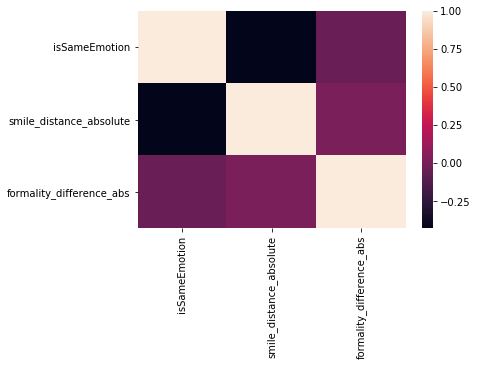

,isSameEmotion,smile_distance_absolute,formality_difference_abs
isSameEmotion,1,-0.42779,-0.0397469
smile_distance_absolute,-0.42779,1,0.0151762
formality_difference_abs,-0.0397469,0.0151762,1


                       cols       vif
0             isSameEmotion  1.049284
1   smile_distance_absolute  1.074664
2  formality_difference_abs  1.078377
Remaining variables:
Index(['isSameEmotion', 'smile_distance_absolute', 'formality_difference_abs'], dtype='object')
                              OLS Regression Results                             
Dep. Variable:     relative_satisfaction   R-squared:                       0.702
Model:                               OLS   Adj. R-squared:                  0.702
Method:                    Least Squares   F-statistic:                     3174.
Date:                   Tue, 11 Sep 2018   Prob (F-statistic):               0.00
Time:                           14:49:16   Log-Likelihood:                -1908.3
No. Observations:                   4042   AIC:                             3823.
Df Residuals:                       4039   BIC:                             3841.
Df Model:                              3                                   

In [1086]:
analysis.test_features(shared_online_X, shared_online_Y, vif_thresh=10)

# Motivation

# Full

### Satisfaction

full_mot= full_set[["satisfaction"]+airbnb_feats+cntry_diversity+demo_diversity]

full_mot_X,full_mot_Y = get_x_y(full_mot, 'satisfaction')

analysis.test_features(full_mot_X, full_mot_Y, vif_thresh=10)

### Relative Satisfaction

In [1090]:
full_mot = full_set[["relative_satisfaction"]+airbnb_feats+cntry_diversity+demo_diversity]

In [1091]:
full_mot_X,full_mot_Y = get_x_y(full_mot, 'relative_satisfaction')

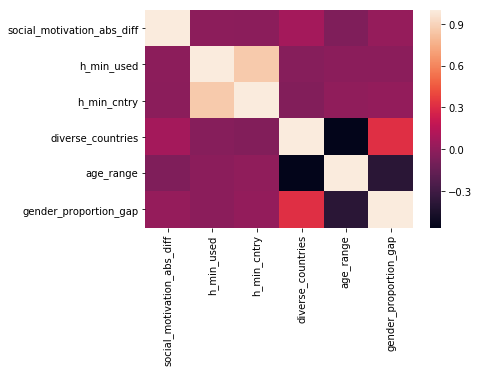

,social_motivation_abs_diff,h_min_used,h_min_cntry,diverse_countries,age_range,gender_proportion_gap
social_motivation_abs_diff,1,-0.0109401,-0.0149096,0.0751301,-0.0590495,0.0200258
h_min_used,-0.0109401,1,0.861411,-0.0379601,-0.0192365,-0.0158057
h_min_cntry,-0.0149096,0.861411,1,-0.0454625,9.81721e-05,0.0133021
diverse_countries,0.0751301,-0.0379601,-0.0454625,1,-0.563214,0.317618
age_range,-0.0590495,-0.0192365,9.81721e-05,-0.563214,1,-0.38748
gender_proportion_gap,0.0200258,-0.0158057,0.0133021,0.317618,-0.38748,1


                         cols       vif
0  social_motivation_abs_diff  2.428213
1                  h_min_used  5.151872
2                 h_min_cntry  5.139897
3           diverse_countries  2.557084
4                   age_range  2.341799
5       gender_proportion_gap  2.294297
Remaining variables:
Index(['social_motivation_abs_diff', 'h_min_used', 'h_min_cntry',
       'diverse_countries', 'age_range', 'gender_proportion_gap'],
      dtype='object')
                              OLS Regression Results                             
Dep. Variable:     relative_satisfaction   R-squared:                       0.918
Model:                               OLS   Adj. R-squared:                  0.918
Method:                    Least Squares   F-statistic:                     9876.
Date:                   Tue, 11 Sep 2018   Prob (F-statistic):               0.00
Time:                           14:52:51   Log-Likelihood:                 1332.2
No. Observations:                   5327   AIC:     

In [1092]:
analysis.test_features(full_mot_X, full_mot_Y, vif_thresh=10)

# Shared

### Satisfaction

shared_mot = shared_set[["satisfaction"]+airbnb_feats+cntry_diversity+demo_diversity]

shared_mot_X,shared_mot_Y = get_x_y(shared_mot, 'satisfaction')

analysis.test_features(shared_mot_X, shared_mot_Y, vif_thresh=10)

### Relative Satisfaction

In [1093]:
shared_mot = shared_set[["relative_satisfaction"]+airbnb_feats+cntry_diversity+demo_diversity]

In [1094]:
shared_mot_X,shared_mot_Y = get_x_y(shared_mot, 'relative_satisfaction')

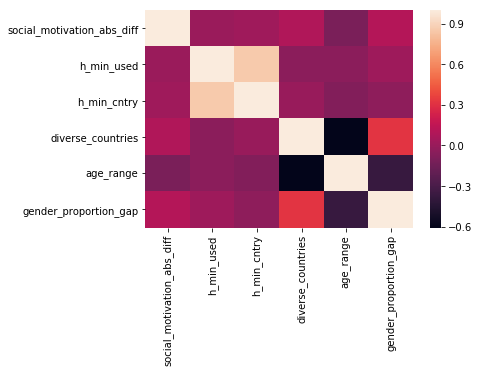

,social_motivation_abs_diff,h_min_used,h_min_cntry,diverse_countries,age_range,gender_proportion_gap
social_motivation_abs_diff,1,0.0108762,0.028925,0.0935351,-0.107485,0.107748
h_min_used,0.0108762,1,0.858115,-0.045134,-0.0451853,0.0246754
h_min_cntry,0.028925,0.858115,1,0.00317677,-0.0753221,-0.0346491
diverse_countries,0.0935351,-0.045134,0.00317677,1,-0.60635,0.31978
age_range,-0.107485,-0.0451853,-0.0753221,-0.60635,1,-0.36928
gender_proportion_gap,0.107748,0.0246754,-0.0346491,0.31978,-0.36928,1


                         cols       vif
0  social_motivation_abs_diff  2.279602
1                  h_min_used  5.244611
2                 h_min_cntry  5.317197
3           diverse_countries  2.385626
4                   age_range  2.348411
5       gender_proportion_gap  2.504459
Remaining variables:
Index(['social_motivation_abs_diff', 'h_min_used', 'h_min_cntry',
       'diverse_countries', 'age_range', 'gender_proportion_gap'],
      dtype='object')
                              OLS Regression Results                             
Dep. Variable:     relative_satisfaction   R-squared:                       0.930
Model:                               OLS   Adj. R-squared:                  0.930
Method:                    Least Squares   F-statistic:                     8942.
Date:                   Tue, 11 Sep 2018   Prob (F-statistic):               0.00
Time:                           14:54:58   Log-Likelihood:                 1019.2
No. Observations:                   4042   AIC:     

In [1095]:
analysis.test_features(shared_mot_X, shared_mot_Y, vif_thresh=10)

# Country_culture

# Full

### Satisfaction

full_cntry = full_set[["satisfaction"]+cntry_cult]

full_cntry_X,full_cntry_Y = get_x_y(full_cntry, 'satisfaction')

analysis.test_features(full_cntry_X, full_cntry_Y, vif_thresh=10)

### Relative Satisfaction

In [1096]:
full_cntry = full_set[["relative_satisfaction"]+cntry_cult]

In [1097]:
full_cntry_X, full_cntry_Y = get_x_y(full_cntry, 'relative_satisfaction')

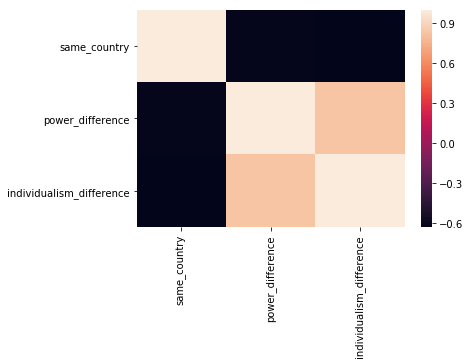

,same_country,power_difference,individualism_difference
same_country,1,-0.615503,-0.629708
power_difference,-0.615503,1,0.833649
individualism_difference,-0.629708,0.833649,1


                       cols       vif
0              same_country  1.000000
1          power_difference  4.059414
2  individualism_difference  4.059414
Remaining variables:
Index(['same_country', 'power_difference', 'individualism_difference'], dtype='object')
                              OLS Regression Results                             
Dep. Variable:     relative_satisfaction   R-squared:                       0.786
Model:                               OLS   Adj. R-squared:                  0.786
Method:                    Least Squares   F-statistic:                     6510.
Date:                   Tue, 11 Sep 2018   Prob (F-statistic):               0.00
Time:                           14:57:33   Log-Likelihood:                -1212.5
No. Observations:                   5327   AIC:                             2431.
Df Residuals:                       5324   BIC:                             2451.
Df Model:                              3                                         
C

In [1098]:
analysis.test_features(full_cntry_X, full_cntry_Y, vif_thresh=10)

# Shared

### Satisfaction

shared_cntry = shared_set[["satisfaction"]+cntry_cult]

shared_cntry_X,shared_cntry_Y = get_x_y(shared_cntry, 'satisfaction')

analysis.test_features(shared_cntry_X, shared_cntry_Y, vif_thresh=10)

### Relative Satisfaction

In [1099]:
shared_cntry = shared_set[["relative_satisfaction"]+cntry_cult]

In [1100]:
shared_cntry_X,shared_cntry_Y = get_x_y(shared_cntry, 'relative_satisfaction')

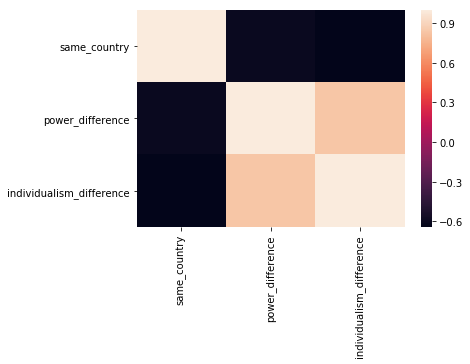

,same_country,power_difference,individualism_difference
same_country,1,-0.599849,-0.643308
power_difference,-0.599849,1,0.835615
individualism_difference,-0.643308,0.835615,1


                       cols       vif
0              same_country  1.000000
1          power_difference  4.343749
2  individualism_difference  4.343749
Remaining variables:
Index(['same_country', 'power_difference', 'individualism_difference'], dtype='object')
                              OLS Regression Results                             
Dep. Variable:     relative_satisfaction   R-squared:                       0.774
Model:                               OLS   Adj. R-squared:                  0.774
Method:                    Least Squares   F-statistic:                     4607.
Date:                   Tue, 11 Sep 2018   Prob (F-statistic):               0.00
Time:                           14:59:14   Log-Likelihood:                -1351.8
No. Observations:                   4042   AIC:                             2710.
Df Residuals:                       4039   BIC:                             2729.
Df Model:                              3                                         
C

In [1101]:
analysis.test_features(shared_cntry_X, shared_cntry_Y, vif_thresh=10)

# Demographics

# Full

### Satisfaction

full_demo = full_set[["satisfaction"]+demo_feats]

full_demo['gender_pairing'].value_counts()

full_demo = analysis.get_dummies(full_demo, 'gender_pairing')

full_demo['age-pairing'].value_counts()

full_demo = analysis.get_dummies(full_demo, 'age-pairing')

full_demo_X,full_demo_Y = get_x_y(full_demo, 'satisfaction')

analysis.test_features(full_demo_X, full_demo_Y, vif_thresh=5)

### Relative Satisfaction

In [1440]:
full_demo = full_set[["relative_satisfaction"]+demo_feats]

In [1441]:
full_demo['gender_pairing'].value_counts()

female-female    1417
male-male        1390
male-female      1304
female-male      1216
Name: gender_pairing, dtype: int64

In [1442]:
full_demo = analysis.get_dummies(full_demo, 'gender_pairing')

In [1443]:
full_demo_X,full_demo_Y = get_x_y(full_demo, 'relative_satisfaction')

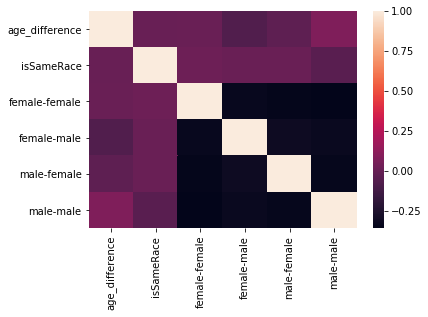

,age_difference,isSameRace,female-female,female-male,male-female,male-male
age_difference,1,0.00406247,0.0122189,-0.070065,-0.0269956,0.0811021
isSameRace,0.00406247,1,0.0201001,0.00907402,0.0118949,-0.0405435
female-female,0.0122189,0.0201001,1,-0.327408,-0.342736,-0.357702
female-male,-0.070065,0.00907402,-0.327408,1,-0.30964,-0.32316
male-female,-0.0269956,0.0118949,-0.342736,-0.30964,1,-0.338289
male-male,0.0811021,-0.0405435,-0.357702,-0.32316,-0.338289,1


             cols       vif
0  age_difference  1.009448
1      isSameRace  1.001735
2   female-female  9.099515
3     female-male  7.583479
4     male-female  8.269578
5       male-male  9.185745
dropping 'male-male' at index: 5
             cols       vif
0  age_difference  5.094352
1      isSameRace  3.416424
2   female-female  1.885780
3     female-male  1.721663
4     male-female  1.795513
dropping 'age_difference' at index: 0
            cols       vif
0     isSameRace  2.235396
1  female-female  1.449652
2    female-male  1.378150
3    male-female  1.407594
Remaining variables:
Index(['isSameRace', 'female-female', 'female-male', 'male-female'], dtype='object')
                              OLS Regression Results                             
Dep. Variable:     relative_satisfaction   R-squared:                       0.813
Model:                               OLS   Adj. R-squared:                  0.813
Method:                    Least Squares   F-statistic:                     57

In [1444]:
analysis.test_features(full_demo_X, full_demo_Y, vif_thresh=4)

# Shared

### Satisfaction

shared_demo = shared_set[["satisfaction"]+demo_feats]

shared_demo['gender_pairing'].value_counts()

shared_demo = analysis.get_dummies(shared_demo, 'gender_pairing')

shared_demo_X,shared_demo_Y = get_x_y(shared_demo, 'satisfaction')

analysis.test_features(shared_demo_X, shared_demo_Y, vif_thresh=5)

### Relative Satisfaction

In [1238]:
shared_demo = shared_set[["relative_satisfaction"]+demo_feats]

In [1239]:
shared_demo['gender_pairing'].value_counts()

female-female    1315
male-male         930
male-female       913
female-male       884
Name: gender_pairing, dtype: int64

In [1240]:
shared_demo = analysis.get_dummies(shared_demo, 'gender_pairing')

In [1241]:
shared_demo_X,shared_demo_Y = get_x_y(shared_demo, 'relative_satisfaction')

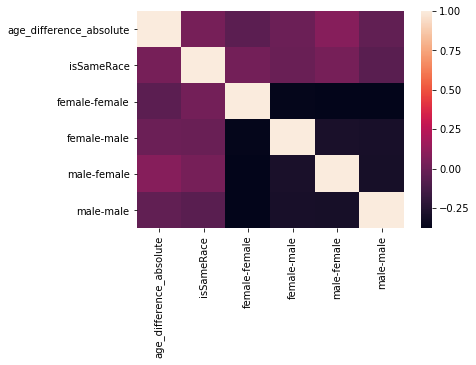

,age_difference_absolute,isSameRace,female-female,female-male,male-female,male-male
age_difference_absolute,1,0.0356498,-0.0510008,0.00290389,0.0861694,-0.0316927
isSameRace,0.0356498,1,0.026275,-0.00377834,0.0359231,-0.0612269
female-female,-0.0510008,0.026275,1,-0.367401,-0.375105,-0.379614
female-male,0.00290389,-0.00377834,-0.367401,1,-0.285794,-0.289229
male-female,0.0861694,0.0359231,-0.375105,-0.285794,1,-0.295294
male-male,-0.0316927,-0.0612269,-0.379614,-0.289229,-0.295294,1


                      cols       vif
0  age_difference_absolute  1.009443
1               isSameRace  1.005468
2            female-female  2.142217
3              female-male  1.778915
4              male-female  1.941479
5                male-male  1.718918
Remaining variables:
Index(['age_difference_absolute', 'isSameRace', 'female-female', 'female-male',
       'male-female', 'male-male'],
      dtype='object')
                              OLS Regression Results                             
Dep. Variable:     relative_satisfaction   R-squared:                       0.010
Model:                               OLS   Adj. R-squared:                  0.008
Method:                    Least Squares   F-statistic:                     7.858
Date:                   Tue, 11 Sep 2018   Prob (F-statistic):           2.25e-07
Time:                           15:43:54   Log-Likelihood:                 2428.3
No. Observations:                   4042   AIC:                            -4845.
Df Resid

In [1242]:
analysis.test_features(shared_demo_X, shared_demo_Y, vif_thresh=10)

# EXTRA

# Profile

# Full

### Satisfaction

In [1080]:
full_profile= full_set[["relative_satisfaction"]+profiles_feat]

KeyError: "['cosine_similarity' 'tfidf'] not in index"

In [930]:
full_profile_X,full_profile_Y = get_x_y(full_profile, 'relative_satisfaction')

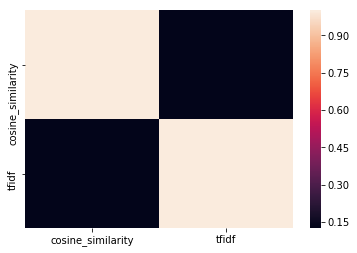

,cosine_similarity,tfidf
cosine_similarity,1,0.127243
tfidf,0.127243,1


                cols       vif
0  cosine_similarity  1.080676
1              tfidf  1.080676
Remaining variables:
Index(['cosine_similarity', 'tfidf'], dtype='object')
                              OLS Regression Results                             
Dep. Variable:     relative_satisfaction   R-squared:                       0.276
Model:                               OLS   Adj. R-squared:                  0.276
Method:                    Least Squares   F-statistic:                     1850.
Date:                   Sun, 09 Sep 2018   Prob (F-statistic):               0.00
Time:                           17:09:05   Log-Likelihood:                -9012.3
No. Observations:                   9716   AIC:                         1.803e+04
Df Residuals:                       9714   BIC:                         1.804e+04
Df Model:                              2                                         
Covariance Type:               nonrobust                                         
            

In [931]:
analysis.test_features(full_profile_X, full_profile_Y, vif_thresh=10)

### Relative Satisfaction

In [949]:
full_profile = full_set[["relative_satisfaction"]+profiles_feat]

In [950]:
full_profile_X,full_profile_Y = get_x_y(full_profile, 'relative_satisfaction')

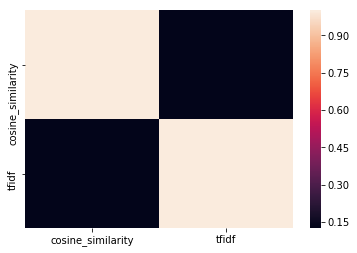

,cosine_similarity,tfidf
cosine_similarity,1,0.127243
tfidf,0.127243,1


                cols       vif
0  cosine_similarity  1.080676
1              tfidf  1.080676
Remaining variables:
Index(['cosine_similarity', 'tfidf'], dtype='object')
                              OLS Regression Results                             
Dep. Variable:     relative_satisfaction   R-squared:                       0.276
Model:                               OLS   Adj. R-squared:                  0.276
Method:                    Least Squares   F-statistic:                     1850.
Date:                   Sun, 09 Sep 2018   Prob (F-statistic):               0.00
Time:                           17:11:10   Log-Likelihood:                -9012.3
No. Observations:                   9716   AIC:                         1.803e+04
Df Residuals:                       9714   BIC:                         1.804e+04
Df Model:                              2                                         
Covariance Type:               nonrobust                                         
            

In [951]:
analysis.test_features(full_profile_X, full_profile_Y, vif_thresh=10)

# Shared

### Satisfaction

In [940]:
shared_profile = shared_set[["satisfaction"]+profiles_feat]

In [941]:
shared_profile_X,shared_profile_Y = get_x_y(shared_profile, 'satisfaction')

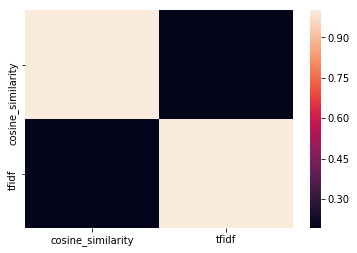

,cosine_similarity,tfidf
cosine_similarity,1,0.192888
tfidf,0.192888,1


                cols       vif
0  cosine_similarity  1.136614
1              tfidf  1.136614
Remaining variables:
Index(['cosine_similarity', 'tfidf'], dtype='object')
                            OLS Regression Results                            
Dep. Variable:           satisfaction   R-squared:                       0.286
Model:                            OLS   Adj. R-squared:                  0.286
Method:                 Least Squares   F-statistic:                     1177.
Date:                Sun, 09 Sep 2018   Prob (F-statistic):               0.00
Time:                        17:09:55   Log-Likelihood:                -5512.5
No. Observations:                5883   AIC:                         1.103e+04
Df Residuals:                    5881   BIC:                         1.104e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err   

In [942]:
analysis.test_features(shared_profile_X, shared_profile_Y, vif_thresh=10)

### Relative Satisfaction

In [946]:
shared_profile = shared_set[["relative_satisfaction"]+profiles_feat]

In [947]:
shared_profile_X,shared_profile_Y = get_x_y(shared_profile, 'relative_satisfaction')

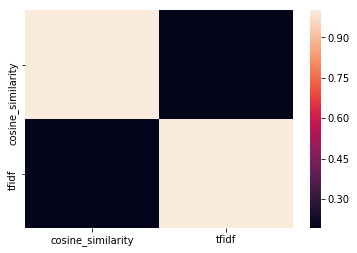

,cosine_similarity,tfidf
cosine_similarity,1,0.192888
tfidf,0.192888,1


                cols       vif
0  cosine_similarity  1.136614
1              tfidf  1.136614
Remaining variables:
Index(['cosine_similarity', 'tfidf'], dtype='object')
                              OLS Regression Results                             
Dep. Variable:     relative_satisfaction   R-squared:                       0.284
Model:                               OLS   Adj. R-squared:                  0.284
Method:                    Least Squares   F-statistic:                     1166.
Date:                   Sun, 09 Sep 2018   Prob (F-statistic):               0.00
Time:                           17:10:22   Log-Likelihood:                -5088.9
No. Observations:                   5883   AIC:                         1.018e+04
Df Residuals:                       5881   BIC:                         1.020e+04
Df Model:                              2                                         
Covariance Type:               nonrobust                                         
            

In [948]:
analysis.test_features(shared_profile_X, shared_profile_Y, vif_thresh=10)

# Demographics + Race - pairing

# Full

### Satisfaction

In [1323]:
full_demo = full_set[["satisfaction"]+demo_feats]

In [1324]:
full_demo['gender_pairing'].value_counts()

female-female    1417
male-male        1390
male-female      1304
female-male      1216
Name: gender_pairing, dtype: int64

In [1325]:
full_demo = analysis.get_dummies(full_demo, 'gender_pairing')

In [1326]:
full_demo['race_pairing'].value_counts()

White-White          3761
White-African         659
African-White         580
African-African       106
White-Hispanic         61
White-Asian            48
Hispanic-White         46
Asian-White            27
African-Asian          13
African-Hispanic       11
Hispanic-African        7
Asian-African           7
Hispanic-Hispanic       1
Name: race_pairing, dtype: int64

In [1327]:
full_demo = analysis.get_dummies(full_demo, 'race_pairing')

full_demo['age-pairing'].value_counts()

full_demo = analysis.get_dummies(full_demo, 'age-pairing')

In [1328]:
full_demo_X,full_demo_Y = get_x_y(full_demo, 'satisfaction')

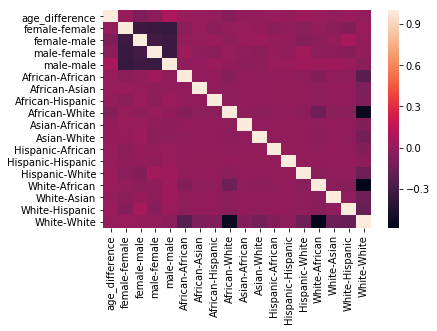

,age_difference,female-female,female-male,male-female,male-male,African-African,African-Asian,African-Hispanic,African-White,Asian-African,Asian-White,Hispanic-African,Hispanic-Hispanic,Hispanic-White,White-African,White-Asian,White-Hispanic,White-White
age_difference,1,0.0122189,-0.070065,-0.0269956,0.0811021,0.0136031,0.0140233,0.000142471,-0.0472477,-0.00239323,0.00141315,0.0129976,0.00805906,0.0317919,0.021164,-0.000707072,0.017666,-0.000435587
female-female,0.0122189,1,-0.327408,-0.342736,-0.357702,-0.0249345,0.013277,-0.0273842,0.00779889,0.0133456,0.0108758,-0.0218368,-0.0082489,-0.0378179,0.000908101,-0.0259329,-0.0528128,0.0275667
female-male,-0.070065,-0.327408,1,-0.30964,-0.32316,-0.000630073,0.00935922,0.0245234,-0.0163651,0.0173108,0.0304628,0.00496448,-0.00745234,-0.0507591,-0.0209613,0.00966967,0.0675772,0.00929949
male-female,-0.0269956,-0.342736,-0.30964,1,-0.338289,0.0376795,-0.0193106,-0.0258981,0.0154483,-0.00859962,-0.0221911,0.00345252,-0.00780123,0.0506782,-0.013681,-0.0219463,-0.0407578,0.000327963
male-male,0.0811021,-0.357702,-0.32316,-0.338289,1,-0.0112005,-0.00339755,0.0294719,-0.00733146,-0.0215535,-0.0183314,0.013847,0.0230608,0.0369473,0.0325152,0.0383391,0.0284579,-0.0369468
African-African,0.0136031,-0.0249345,-0.000630073,0.0376795,-0.0112005,1,-0.00704753,-0.00648157,-0.0498059,-0.00516856,-0.01017,-0.00516856,-0.00195243,-0.0132983,-0.0535369,-0.0135869,-0.0153356,-0.220817
African-Asian,0.0140233,0.013277,0.00935922,-0.0193106,-0.00339755,-0.00704753,1,-0.00224991,-0.0172888,-0.00179413,-0.00353025,-0.00179413,-0.000677736,-0.00461617,-0.018584,-0.00471635,-0.00532335,-0.0766508
African-Hispanic,0.000142471,-0.0273842,0.0245234,-0.0258981,0.0294719,-0.00648157,-0.00224991,1,-0.0159004,-0.00165005,-0.00324674,-0.00165005,-0.000623309,-0.00424546,-0.0170915,-0.00433759,-0.00489585,-0.0704952
African-White,-0.0472477,0.00779889,-0.0163651,0.0154483,-0.00733146,-0.0498059,-0.0172888,-0.0159004,1,-0.0126794,-0.0249487,-0.0126794,-0.00478965,-0.0326231,-0.131335,-0.0333311,-0.0376209,-0.541702
Asian-African,-0.00239323,0.0133456,0.0173108,-0.00859962,-0.0215535,-0.00516856,-0.00179413,-0.00165005,-0.0126794,1,-0.00258903,-0.00131579,-0.000497041,-0.00338543,-0.0136292,-0.0034589,-0.00390407,-0.0562146


/Users/lynraybarends/anaconda3/lib/python3.6/site-packages/statsmodels/stats/outliers_influence.py:167: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


                 cols       vif
0      age_difference  1.012535
1       female-female       inf
2         female-male       inf
3         male-female       inf
4           male-male       inf
5     African-African       inf
6       African-Asian       inf
7    African-Hispanic       inf
8       African-White       inf
9       Asian-African       inf
10        Asian-White       inf
11   Hispanic-African       inf
12  Hispanic-Hispanic       inf
13     Hispanic-White       inf
14      White-African       inf
15        White-Asian       inf
16     White-Hispanic       inf
17        White-White       inf
dropping 'female-female' at index: 1
                 cols        vif
0      age_difference   1.013591
1         female-male   1.449957
2         male-female   1.459633
3           male-male   1.480729
4     African-African   1.648042
5       African-Asian   1.081006
6    African-Hispanic   1.069636
7       African-White   4.184929
8       Asian-African   1.039353
9         Asian-White   1

In [1330]:
analysis.test_features(full_demo_X, full_demo_Y, vif_thresh=10)

### Relative Satisfaction

In [1331]:
full_demo = full_set[["relative_satisfaction"]+demo_feats]

In [1332]:
full_demo['gender_pairing'].value_counts()

female-female    1417
male-male        1390
male-female      1304
female-male      1216
Name: gender_pairing, dtype: int64

In [1333]:
full_demo = analysis.get_dummies(full_demo, 'gender_pairing')

In [1334]:
full_demo['race_pairing'].value_counts()

White-White          3761
White-African         659
African-White         580
African-African       106
White-Hispanic         61
White-Asian            48
Hispanic-White         46
Asian-White            27
African-Asian          13
African-Hispanic       11
Hispanic-African        7
Asian-African           7
Hispanic-Hispanic       1
Name: race_pairing, dtype: int64

In [1335]:
full_demo = analysis.get_dummies(full_demo, 'race_pairing')

In [1336]:
full_demo_X,full_demo_Y = get_x_y(full_demo, 'relative_satisfaction')

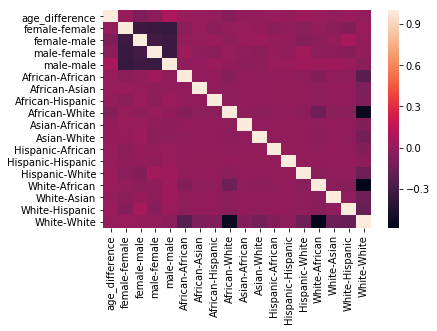

,age_difference,female-female,female-male,male-female,male-male,African-African,African-Asian,African-Hispanic,African-White,Asian-African,Asian-White,Hispanic-African,Hispanic-Hispanic,Hispanic-White,White-African,White-Asian,White-Hispanic,White-White
age_difference,1,0.0122189,-0.070065,-0.0269956,0.0811021,0.0136031,0.0140233,0.000142471,-0.0472477,-0.00239323,0.00141315,0.0129976,0.00805906,0.0317919,0.021164,-0.000707072,0.017666,-0.000435587
female-female,0.0122189,1,-0.327408,-0.342736,-0.357702,-0.0249345,0.013277,-0.0273842,0.00779889,0.0133456,0.0108758,-0.0218368,-0.0082489,-0.0378179,0.000908101,-0.0259329,-0.0528128,0.0275667
female-male,-0.070065,-0.327408,1,-0.30964,-0.32316,-0.000630073,0.00935922,0.0245234,-0.0163651,0.0173108,0.0304628,0.00496448,-0.00745234,-0.0507591,-0.0209613,0.00966967,0.0675772,0.00929949
male-female,-0.0269956,-0.342736,-0.30964,1,-0.338289,0.0376795,-0.0193106,-0.0258981,0.0154483,-0.00859962,-0.0221911,0.00345252,-0.00780123,0.0506782,-0.013681,-0.0219463,-0.0407578,0.000327963
male-male,0.0811021,-0.357702,-0.32316,-0.338289,1,-0.0112005,-0.00339755,0.0294719,-0.00733146,-0.0215535,-0.0183314,0.013847,0.0230608,0.0369473,0.0325152,0.0383391,0.0284579,-0.0369468
African-African,0.0136031,-0.0249345,-0.000630073,0.0376795,-0.0112005,1,-0.00704753,-0.00648157,-0.0498059,-0.00516856,-0.01017,-0.00516856,-0.00195243,-0.0132983,-0.0535369,-0.0135869,-0.0153356,-0.220817
African-Asian,0.0140233,0.013277,0.00935922,-0.0193106,-0.00339755,-0.00704753,1,-0.00224991,-0.0172888,-0.00179413,-0.00353025,-0.00179413,-0.000677736,-0.00461617,-0.018584,-0.00471635,-0.00532335,-0.0766508
African-Hispanic,0.000142471,-0.0273842,0.0245234,-0.0258981,0.0294719,-0.00648157,-0.00224991,1,-0.0159004,-0.00165005,-0.00324674,-0.00165005,-0.000623309,-0.00424546,-0.0170915,-0.00433759,-0.00489585,-0.0704952
African-White,-0.0472477,0.00779889,-0.0163651,0.0154483,-0.00733146,-0.0498059,-0.0172888,-0.0159004,1,-0.0126794,-0.0249487,-0.0126794,-0.00478965,-0.0326231,-0.131335,-0.0333311,-0.0376209,-0.541702
Asian-African,-0.00239323,0.0133456,0.0173108,-0.00859962,-0.0215535,-0.00516856,-0.00179413,-0.00165005,-0.0126794,1,-0.00258903,-0.00131579,-0.000497041,-0.00338543,-0.0136292,-0.0034589,-0.00390407,-0.0562146


/Users/lynraybarends/anaconda3/lib/python3.6/site-packages/statsmodels/stats/outliers_influence.py:167: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


                 cols       vif
0      age_difference  1.012535
1       female-female       inf
2         female-male       inf
3         male-female       inf
4           male-male       inf
5     African-African       inf
6       African-Asian       inf
7    African-Hispanic       inf
8       African-White       inf
9       Asian-African       inf
10        Asian-White       inf
11   Hispanic-African       inf
12  Hispanic-Hispanic       inf
13     Hispanic-White       inf
14      White-African       inf
15        White-Asian       inf
16     White-Hispanic       inf
17        White-White       inf
dropping 'female-female' at index: 1
                 cols        vif
0      age_difference   1.013591
1         female-male   1.449957
2         male-female   1.459633
3           male-male   1.480729
4     African-African   1.648042
5       African-Asian   1.081006
6    African-Hispanic   1.069636
7       African-White   4.184929
8       Asian-African   1.039353
9         Asian-White   1

In [1337]:
analysis.test_features(full_demo_X, full_demo_Y, vif_thresh=4)

# Shared

### Satisfaction

In [1338]:
shared_demo = shared_set[["satisfaction"]+demo_feats]

In [1339]:
shared_demo['gender_pairing'].value_counts()

female-female    1315
male-male         930
male-female       913
female-male       884
Name: gender_pairing, dtype: int64

In [1340]:
shared_demo = analysis.get_dummies(shared_demo, 'gender_pairing')

In [1341]:
shared_demo['race_pairing'].value_counts()

White-White         2636
African-White        533
White-African        489
African-African      129
Asian-White           76
White-Asian           57
White-Hispanic        41
Hispanic-White        30
Asian-African         18
Hispanic-African      11
African-Hispanic      11
African-Asian          9
Asian-Asian            1
Asian-Hispanic         1
Name: race_pairing, dtype: int64

In [1342]:
shared_demo = analysis.get_dummies(shared_demo, 'race_pairing')

In [1343]:
shared_demo_X,shared_demo_Y = get_x_y(shared_demo, 'satisfaction')

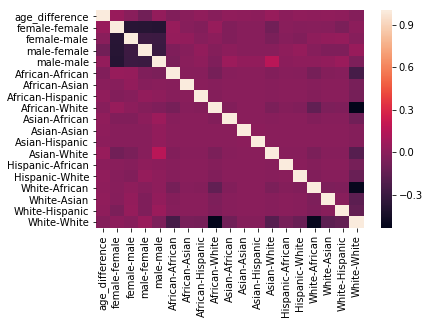

,age_difference,female-female,female-male,male-female,male-male,African-African,African-Asian,African-Hispanic,African-White,Asian-African,Asian-Asian,Asian-Hispanic,Asian-White,Hispanic-African,Hispanic-White,White-African,White-Asian,White-Hispanic,White-White
age_difference,1,0.0510008,-0.00290389,-0.0861694,0.0316927,-0.0356549,-0.000859412,0.0195807,-0.0106631,0.021881,0.0137987,0.00655502,0.0440539,0.00427354,0.0207692,0.0171224,0.0213341,0.0154646,-0.0220863
female-female,0.0510008,1,-0.367401,-0.375105,-0.379614,0.0451602,-0.010397,-0.0261387,0.044633,-0.0305819,-0.0109239,-0.0109239,-0.0844647,-0.00586573,-0.0169809,-0.00985908,-0.0158722,-0.0492154,0.00933505
female-male,-0.00290389,-0.367401,1,-0.285794,-0.289229,0.0367303,0.0257977,-0.0161498,0.0113759,-0.0353857,-0.00832292,-0.00832292,-0.0600213,-0.0161498,-0.0318049,0.0129462,0.0331654,0.0360356,-0.0169676
male-female,-0.0861694,-0.375105,-0.285794,1,-0.295294,-0.037491,-0.0129653,0.0285662,-0.0199226,0.00830096,-0.00849744,-0.00849744,-0.00943808,0.0172094,0.0360074,-0.0171531,-0.0395149,-0.036968,0.0491725
male-male,0.0316927,-0.379614,-0.289229,-0.295294,1,-0.0490949,-0.000882408,0.0165759,-0.0410613,0.0605478,0.0287762,0.0287762,0.162346,0.00529266,0.0143645,0.0153015,0.0243538,0.0561196,-0.0425805
African-African,-0.0356549,0.0451602,0.0367303,-0.037491,-0.0490949,1,-0.00857723,-0.00948484,-0.0707639,-0.0121436,-0.00285625,-0.00285625,-0.0251345,-0.00948484,-0.0157007,-0.0673592,-0.0217152,-0.0183801,-0.248611
African-Asian,-0.000859412,-0.010397,0.0257977,-0.0129653,-0.000882408,-0.00857723,1,-0.00246773,-0.0184111,-0.00315947,-0.000743126,-0.000743126,-0.0065394,-0.00246773,-0.00408496,-0.0175252,-0.00564977,-0.00478206,-0.0646826
African-Hispanic,0.0195807,-0.0261387,-0.0161498,0.0285662,0.0165759,-0.00948484,-0.00246773,1,-0.0203593,-0.00349379,-0.000821761,-0.000821761,-0.00723137,-0.00272885,-0.00451721,-0.0193797,-0.0062476,-0.00528807,-0.071527
African-White,-0.0106631,0.044633,0.0113759,-0.0199226,-0.0410613,-0.0707639,-0.0184111,-0.0203593,1,-0.0260663,-0.00613095,-0.00613095,-0.0539514,-0.0203593,-0.0337017,-0.144587,-0.0466117,-0.039453,-0.533644
Asian-African,0.021881,-0.0305819,-0.0353857,0.00830096,0.0605478,-0.0121436,-0.00315947,-0.00349379,-0.0260663,1,-0.00105211,-0.00105211,-0.00925844,-0.00349379,-0.00578346,-0.0248121,-0.0079989,-0.00677041,-0.0915772


/Users/lynraybarends/anaconda3/lib/python3.6/site-packages/statsmodels/stats/outliers_influence.py:167: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


                cols       vif
0     age_difference  1.008853
1      female-female       inf
2        female-male       inf
3        male-female       inf
4          male-male       inf
5    African-African       inf
6      African-Asian       inf
7   African-Hispanic       inf
8      African-White       inf
9      Asian-African       inf
10       Asian-Asian       inf
11    Asian-Hispanic       inf
12       Asian-White       inf
13  Hispanic-African       inf
14    Hispanic-White       inf
15     White-African       inf
16       White-Asian       inf
17    White-Hispanic       inf
18       White-White       inf
dropping 'female-female' at index: 1
                cols        vif
0     age_difference   1.014613
1        female-male   1.313989
2        male-female   1.333905
3          male-male   1.368937
4    African-African   1.552235
5      African-Asian   1.045379
6   African-Hispanic   1.069416
7      African-White   3.512769
8      Asian-African   1.111806
9        Asian-Asian   

In [1344]:
analysis.test_features(shared_demo_X, shared_demo_Y, vif_thresh=10)

### Relative Satisfaction

In [1354]:
shared_demo = shared_set[["relative_satisfaction"]+demo_feats]

In [1355]:
shared_demo['gender_pairing'].value_counts()

female-female    1315
male-male         930
male-female       913
female-male       884
Name: gender_pairing, dtype: int64

In [1356]:
shared_demo = analysis.get_dummies(shared_demo, 'gender_pairing')

In [1359]:
shared_demo['race_pairing'].value_counts()

White-White         2636
African-White        533
White-African        489
African-African      129
Asian-White           76
White-Asian           57
White-Hispanic        41
Hispanic-White        30
Asian-African         18
Hispanic-African      11
African-Hispanic      11
African-Asian          9
Asian-Asian            1
Asian-Hispanic         1
Name: race_pairing, dtype: int64

In [1349]:
shared_demo = analysis.get_dummies(shared_demo, 'race_pairing')

In [1350]:
shared_demo_X,shared_demo_Y = get_x_y(shared_demo, 'relative_satisfaction')

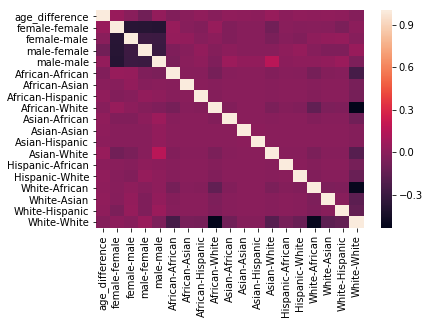

,age_difference,female-female,female-male,male-female,male-male,African-African,African-Asian,African-Hispanic,African-White,Asian-African,Asian-Asian,Asian-Hispanic,Asian-White,Hispanic-African,Hispanic-White,White-African,White-Asian,White-Hispanic,White-White
age_difference,1,0.0510008,-0.00290389,-0.0861694,0.0316927,-0.0356549,-0.000859412,0.0195807,-0.0106631,0.021881,0.0137987,0.00655502,0.0440539,0.00427354,0.0207692,0.0171224,0.0213341,0.0154646,-0.0220863
female-female,0.0510008,1,-0.367401,-0.375105,-0.379614,0.0451602,-0.010397,-0.0261387,0.044633,-0.0305819,-0.0109239,-0.0109239,-0.0844647,-0.00586573,-0.0169809,-0.00985908,-0.0158722,-0.0492154,0.00933505
female-male,-0.00290389,-0.367401,1,-0.285794,-0.289229,0.0367303,0.0257977,-0.0161498,0.0113759,-0.0353857,-0.00832292,-0.00832292,-0.0600213,-0.0161498,-0.0318049,0.0129462,0.0331654,0.0360356,-0.0169676
male-female,-0.0861694,-0.375105,-0.285794,1,-0.295294,-0.037491,-0.0129653,0.0285662,-0.0199226,0.00830096,-0.00849744,-0.00849744,-0.00943808,0.0172094,0.0360074,-0.0171531,-0.0395149,-0.036968,0.0491725
male-male,0.0316927,-0.379614,-0.289229,-0.295294,1,-0.0490949,-0.000882408,0.0165759,-0.0410613,0.0605478,0.0287762,0.0287762,0.162346,0.00529266,0.0143645,0.0153015,0.0243538,0.0561196,-0.0425805
African-African,-0.0356549,0.0451602,0.0367303,-0.037491,-0.0490949,1,-0.00857723,-0.00948484,-0.0707639,-0.0121436,-0.00285625,-0.00285625,-0.0251345,-0.00948484,-0.0157007,-0.0673592,-0.0217152,-0.0183801,-0.248611
African-Asian,-0.000859412,-0.010397,0.0257977,-0.0129653,-0.000882408,-0.00857723,1,-0.00246773,-0.0184111,-0.00315947,-0.000743126,-0.000743126,-0.0065394,-0.00246773,-0.00408496,-0.0175252,-0.00564977,-0.00478206,-0.0646826
African-Hispanic,0.0195807,-0.0261387,-0.0161498,0.0285662,0.0165759,-0.00948484,-0.00246773,1,-0.0203593,-0.00349379,-0.000821761,-0.000821761,-0.00723137,-0.00272885,-0.00451721,-0.0193797,-0.0062476,-0.00528807,-0.071527
African-White,-0.0106631,0.044633,0.0113759,-0.0199226,-0.0410613,-0.0707639,-0.0184111,-0.0203593,1,-0.0260663,-0.00613095,-0.00613095,-0.0539514,-0.0203593,-0.0337017,-0.144587,-0.0466117,-0.039453,-0.533644
Asian-African,0.021881,-0.0305819,-0.0353857,0.00830096,0.0605478,-0.0121436,-0.00315947,-0.00349379,-0.0260663,1,-0.00105211,-0.00105211,-0.00925844,-0.00349379,-0.00578346,-0.0248121,-0.0079989,-0.00677041,-0.0915772


/Users/lynraybarends/anaconda3/lib/python3.6/site-packages/statsmodels/stats/outliers_influence.py:167: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


                cols       vif
0     age_difference  1.008853
1      female-female       inf
2        female-male       inf
3        male-female       inf
4          male-male       inf
5    African-African       inf
6      African-Asian       inf
7   African-Hispanic       inf
8      African-White       inf
9      Asian-African       inf
10       Asian-Asian       inf
11    Asian-Hispanic       inf
12       Asian-White       inf
13  Hispanic-African       inf
14    Hispanic-White       inf
15     White-African       inf
16       White-Asian       inf
17    White-Hispanic       inf
18       White-White       inf
dropping 'female-female' at index: 1
                cols        vif
0     age_difference   1.014613
1        female-male   1.313989
2        male-female   1.333905
3          male-male   1.368937
4    African-African   1.552235
5      African-Asian   1.045379
6   African-Hispanic   1.069416
7      African-White   3.512769
8      Asian-African   1.111806
9        Asian-Asian   

In [1352]:
analysis.test_features(shared_demo_X, shared_demo_Y, vif_thresh=4)

# Profile Emotion + emotion pairing

# Full

### Satisfaction

In [829]:
full_emotion = full_set[["satisfaction"]+demo_emotion]

In [830]:
full_emotion['emotion_pairing'].value_counts()

happiness-happiness    1733
sadness-happiness       709
happiness-sadness       440
happiness-anger         318
anger-happiness         305
disgust-happiness       223
happiness-disgust       205
sadness-sadness         181
happiness-fear          175
fear-happiness          133
sadness-anger           129
anger-sadness            96
sadness-disgust          91
sadness-fear             82
anger-anger              64
disgust-sadness          62
happiness-surprise       56
surprise-happiness       48
disgust-anger            48
anger-disgust            42
fear-sadness             40
disgust-fear             35
anger-fear               30
sadness-surprise         28
fear-anger               24
disgust-disgust          23
fear-disgust             13
fear-fear                13
surprise-sadness         12
anger-surprise           11
disgust-surprise          9
surprise-anger            7
surprise-disgust          6
fear-surprise             4
surprise-surprise         2
surprise-fear       

In [831]:
full_emotion = analysis.get_dummies(full_emotion, 'emotion_pairing')

In [832]:
full_emotion_X,full_emotion_Y = get_x_y(full_emotion, 'satisfaction')

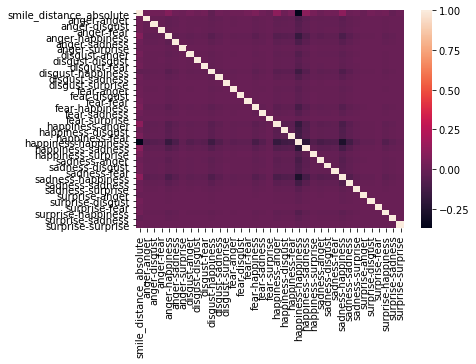

,smile_distance_absolute,anger-anger,anger-disgust,anger-fear,anger-happiness,anger-sadness,anger-surprise,disgust-anger,disgust-disgust,disgust-fear,disgust-happiness,disgust-sadness,disgust-surprise,fear-anger,fear-disgust,fear-fear,fear-happiness,fear-sadness,fear-surprise,happiness-anger,happiness-disgust,happiness-fear,happiness-happiness,happiness-sadness,happiness-surprise,sadness-anger,sadness-disgust,sadness-fear,sadness-happiness,sadness-sadness,sadness-surprise,surprise-anger,surprise-disgust,surprise-fear,surprise-happiness,surprise-sadness,surprise-surprise
smile_distance_absolute,1,0.0244582,0.0245334,0.0261454,0.0849225,0.0198541,0.00785315,0.0358031,0.0142226,0.029443,-0.0297415,0.019255,0.00956766,0.015384,0.0117704,0.0354288,0.0591227,0.0209854,-0.00284114,0.11526,0.0141084,0.0524182,-0.369251,0.105505,0.0474756,0.00780008,0.0299232,0.024975,0.113347,0.00953266,0.0173117,-0.0037316,0.0326279,0.0199308,0.0311513,-0.0157046,0.0058685
anger-anger,0.0244582,1,-0.00969991,-0.00818875,-0.0268057,-0.0147394,-0.00494979,-0.0103755,-0.00716536,-0.00884899,-0.0227384,-0.0118073,-0.00447642,-0.00732015,-0.00538198,-0.00538198,-0.0174097,-0.00946438,-0.0029829,-0.027406,-0.0217636,-0.0200504,-0.0753227,-0.0326315,-0.0112152,-0.0171393,-0.0143436,-0.0136044,-0.0425938,-0.0204029,-0.00790962,-0.0039471,-0.00365396,-0.00149103,-0.0103755,-0.00517036,-0.00210883
anger-disgust,0.0245334,-0.00969991,1,-0.00662001,-0.0216704,-0.0119157,-0.00400154,-0.0083878,-0.00579267,-0.00715376,-0.0183824,-0.00954536,-0.00361886,-0.00591781,-0.00435094,-0.00435094,-0.0140744,-0.00765126,-0.00241145,-0.0221557,-0.0175943,-0.0162093,-0.0608929,-0.0263802,-0.00906664,-0.0138559,-0.0115958,-0.0109981,-0.034434,-0.0164943,-0.00639435,-0.00319094,-0.00295396,-0.00120539,-0.0083878,-0.00417986,-0.00170484
anger-fear,0.0261454,-0.00818875,-0.00662001,1,-0.0182944,-0.0100594,-0.00337814,-0.00708106,-0.00489023,-0.00603927,-0.0155186,-0.00805828,-0.00305507,-0.00499587,-0.0036731,-0.0036731,-0.0118818,-0.00645926,-0.00203577,-0.0187041,-0.0148533,-0.013684,-0.0514063,-0.0222704,-0.00765414,-0.0116973,-0.00978927,-0.00928472,-0.0290695,-0.0139246,-0.00539817,-0.00269382,-0.00249376,-0.0010176,-0.00708106,-0.00352868,-0.00143924
anger-happiness,0.0849225,-0.0268057,-0.0216704,-0.0182944,1,-0.032929,-0.0110582,-0.0231796,-0.016008,-0.0197694,-0.0507996,-0.0263786,-0.0100007,-0.0163538,-0.0120238,-0.0120238,-0.0388946,-0.0211442,-0.00666404,-0.0612273,-0.0486218,-0.0447942,-0.168277,-0.0729014,-0.0250556,-0.0382907,-0.0320449,-0.0303933,-0.0951582,-0.0455819,-0.0176707,-0.00881815,-0.00816326,-0.00333109,-0.0231796,-0.011551,-0.00471131
anger-sadness,0.0198541,-0.0147394,-0.0119157,-0.0100594,-0.032929,1,-0.00608049,-0.0127456,-0.00880218,-0.0108704,-0.0279327,-0.0145045,-0.00549899,-0.00899234,-0.00661142,-0.00661142,-0.0213866,-0.0116264,-0.00366429,-0.0336665,-0.0267352,-0.0246306,-0.092529,-0.0400856,-0.0137771,-0.0210546,-0.0176202,-0.0167121,-0.0523237,-0.0250637,-0.00971645,-0.00484875,-0.00448866,-0.00183164,-0.0127456,-0.00635145,-0.00259057
anger-surprise,0.00785315,-0.00494979,-0.00400154,-0.00337814,-0.0110582,-0.00608049,1,-0.00428022,-0.00295595,-0.00365051,-0.00938037,-0.00487092,-0.00184667,-0.00301981,-0.00222025,-0.00222025,-0.00718207,-0.00390437,-0.00123054,-0.0113059,-0.00897823,-0.00827145,-0.0310731,-0.0134616,-0.00462663,-0.00707056,-0.00591724,-0.00561225,-0.0175714,-0.00841689,-0.00326298,-0.00162831,-0.00150738,-0.000615101,-0.00428022,-0.00213295,-0.000869965
disgust-anger,0.0358031,-0.0103755,-0.0083878,-0.00708106,-0.0231796,-0.0127456,-0.00428022,1,-0.0061961,-0.00765198,-0.0196626,-0.0102101,-0.00387089,-0.00632995,-0.00465396,-0.00465396,-0.0150546,-0.00818413,-0.0025794,-0.0236987,-0.0188196,-0.0173381,-0.0651337,-0.0282174,-0.00969808,-0.0148209,-0.0124034,-0.0117641,-0.0368321,-0.017643,-0.00683968,-0.00341317,-0.00315969,-0.00128934,-0.00897196,-0.00447096,-0.00182357
disgust-disgust,0.0142226,-0.00716536,-0.00579267,

                       cols       vif
0   smile_distance_absolute  1.182644
1               anger-anger  1.019176
2             anger-disgust  1.013768
3                anger-fear  1.011038
4           anger-happiness  1.111746
5             anger-sadness  1.025158
6            anger-surprise  1.003023
7             disgust-anger  1.018438
8           disgust-disgust  1.006822
9              disgust-fear  1.013171
10        disgust-happiness  1.031493
11          disgust-sadness  1.017185
12         disgust-surprise  1.002747
13               fear-anger  1.007276
14             fear-disgust  1.004004
15                fear-fear  1.007917
16           fear-happiness  1.050628
17             fear-sadness  1.012390
18            fear-surprise  1.000621
19          happiness-anger  1.137888
20        happiness-disgust  1.046467
21           happiness-fear  1.058243
22      happiness-happiness  1.063564
23        happiness-sadness  1.162991
24       happiness-surprise  1.024386
25          

In [833]:
analysis.test_features(full_emotion_X, full_emotion_Y, vif_thresh=10)

### Relative Satisfaction

In [834]:
full_emotion = full_set[["relative_satisfaction"]+demo_emotion]

In [835]:
full_emotion['emotion_pairing'].value_counts()

happiness-happiness    1733
sadness-happiness       709
happiness-sadness       440
happiness-anger         318
anger-happiness         305
disgust-happiness       223
happiness-disgust       205
sadness-sadness         181
happiness-fear          175
fear-happiness          133
sadness-anger           129
anger-sadness            96
sadness-disgust          91
sadness-fear             82
anger-anger              64
disgust-sadness          62
happiness-surprise       56
surprise-happiness       48
disgust-anger            48
anger-disgust            42
fear-sadness             40
disgust-fear             35
anger-fear               30
sadness-surprise         28
fear-anger               24
disgust-disgust          23
fear-disgust             13
fear-fear                13
surprise-sadness         12
anger-surprise           11
disgust-surprise          9
surprise-anger            7
surprise-disgust          6
fear-surprise             4
surprise-surprise         2
surprise-fear       

In [836]:
full_emotion = analysis.get_dummies(full_emotion, 'emotion_pairing')

In [837]:
full_emotion_X,full_emotion_Y = get_x_y(full_emotion, 'relative_satisfaction')

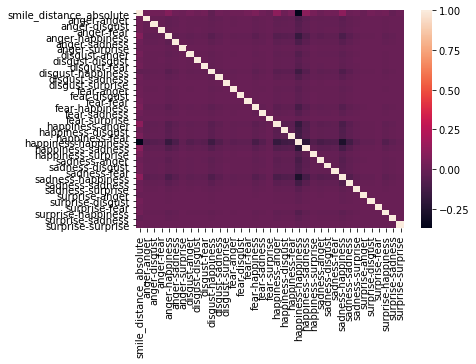

,smile_distance_absolute,anger-anger,anger-disgust,anger-fear,anger-happiness,anger-sadness,anger-surprise,disgust-anger,disgust-disgust,disgust-fear,disgust-happiness,disgust-sadness,disgust-surprise,fear-anger,fear-disgust,fear-fear,fear-happiness,fear-sadness,fear-surprise,happiness-anger,happiness-disgust,happiness-fear,happiness-happiness,happiness-sadness,happiness-surprise,sadness-anger,sadness-disgust,sadness-fear,sadness-happiness,sadness-sadness,sadness-surprise,surprise-anger,surprise-disgust,surprise-fear,surprise-happiness,surprise-sadness,surprise-surprise
smile_distance_absolute,1,0.0244582,0.0245334,0.0261454,0.0849225,0.0198541,0.00785315,0.0358031,0.0142226,0.029443,-0.0297415,0.019255,0.00956766,0.015384,0.0117704,0.0354288,0.0591227,0.0209854,-0.00284114,0.11526,0.0141084,0.0524182,-0.369251,0.105505,0.0474756,0.00780008,0.0299232,0.024975,0.113347,0.00953266,0.0173117,-0.0037316,0.0326279,0.0199308,0.0311513,-0.0157046,0.0058685
anger-anger,0.0244582,1,-0.00969991,-0.00818875,-0.0268057,-0.0147394,-0.00494979,-0.0103755,-0.00716536,-0.00884899,-0.0227384,-0.0118073,-0.00447642,-0.00732015,-0.00538198,-0.00538198,-0.0174097,-0.00946438,-0.0029829,-0.027406,-0.0217636,-0.0200504,-0.0753227,-0.0326315,-0.0112152,-0.0171393,-0.0143436,-0.0136044,-0.0425938,-0.0204029,-0.00790962,-0.0039471,-0.00365396,-0.00149103,-0.0103755,-0.00517036,-0.00210883
anger-disgust,0.0245334,-0.00969991,1,-0.00662001,-0.0216704,-0.0119157,-0.00400154,-0.0083878,-0.00579267,-0.00715376,-0.0183824,-0.00954536,-0.00361886,-0.00591781,-0.00435094,-0.00435094,-0.0140744,-0.00765126,-0.00241145,-0.0221557,-0.0175943,-0.0162093,-0.0608929,-0.0263802,-0.00906664,-0.0138559,-0.0115958,-0.0109981,-0.034434,-0.0164943,-0.00639435,-0.00319094,-0.00295396,-0.00120539,-0.0083878,-0.00417986,-0.00170484
anger-fear,0.0261454,-0.00818875,-0.00662001,1,-0.0182944,-0.0100594,-0.00337814,-0.00708106,-0.00489023,-0.00603927,-0.0155186,-0.00805828,-0.00305507,-0.00499587,-0.0036731,-0.0036731,-0.0118818,-0.00645926,-0.00203577,-0.0187041,-0.0148533,-0.013684,-0.0514063,-0.0222704,-0.00765414,-0.0116973,-0.00978927,-0.00928472,-0.0290695,-0.0139246,-0.00539817,-0.00269382,-0.00249376,-0.0010176,-0.00708106,-0.00352868,-0.00143924
anger-happiness,0.0849225,-0.0268057,-0.0216704,-0.0182944,1,-0.032929,-0.0110582,-0.0231796,-0.016008,-0.0197694,-0.0507996,-0.0263786,-0.0100007,-0.0163538,-0.0120238,-0.0120238,-0.0388946,-0.0211442,-0.00666404,-0.0612273,-0.0486218,-0.0447942,-0.168277,-0.0729014,-0.0250556,-0.0382907,-0.0320449,-0.0303933,-0.0951582,-0.0455819,-0.0176707,-0.00881815,-0.00816326,-0.00333109,-0.0231796,-0.011551,-0.00471131
anger-sadness,0.0198541,-0.0147394,-0.0119157,-0.0100594,-0.032929,1,-0.00608049,-0.0127456,-0.00880218,-0.0108704,-0.0279327,-0.0145045,-0.00549899,-0.00899234,-0.00661142,-0.00661142,-0.0213866,-0.0116264,-0.00366429,-0.0336665,-0.0267352,-0.0246306,-0.092529,-0.0400856,-0.0137771,-0.0210546,-0.0176202,-0.0167121,-0.0523237,-0.0250637,-0.00971645,-0.00484875,-0.00448866,-0.00183164,-0.0127456,-0.00635145,-0.00259057
anger-surprise,0.00785315,-0.00494979,-0.00400154,-0.00337814,-0.0110582,-0.00608049,1,-0.00428022,-0.00295595,-0.00365051,-0.00938037,-0.00487092,-0.00184667,-0.00301981,-0.00222025,-0.00222025,-0.00718207,-0.00390437,-0.00123054,-0.0113059,-0.00897823,-0.00827145,-0.0310731,-0.0134616,-0.00462663,-0.00707056,-0.00591724,-0.00561225,-0.0175714,-0.00841689,-0.00326298,-0.00162831,-0.00150738,-0.000615101,-0.00428022,-0.00213295,-0.000869965
disgust-anger,0.0358031,-0.0103755,-0.0083878,-0.00708106,-0.0231796,-0.0127456,-0.00428022,1,-0.0061961,-0.00765198,-0.0196626,-0.0102101,-0.00387089,-0.00632995,-0.00465396,-0.00465396,-0.0150546,-0.00818413,-0.0025794,-0.0236987,-0.0188196,-0.0173381,-0.0651337,-0.0282174,-0.00969808,-0.0148209,-0.0124034,-0.0117641,-0.0368321,-0.017643,-0.00683968,-0.00341317,-0.00315969,-0.00128934,-0.00897196,-0.00447096,-0.00182357
disgust-disgust,0.0142226,-0.00716536,-0.00579267,

                       cols       vif
0   smile_distance_absolute  1.182644
1               anger-anger  1.019176
2             anger-disgust  1.013768
3                anger-fear  1.011038
4           anger-happiness  1.111746
5             anger-sadness  1.025158
6            anger-surprise  1.003023
7             disgust-anger  1.018438
8           disgust-disgust  1.006822
9              disgust-fear  1.013171
10        disgust-happiness  1.031493
11          disgust-sadness  1.017185
12         disgust-surprise  1.002747
13               fear-anger  1.007276
14             fear-disgust  1.004004
15                fear-fear  1.007917
16           fear-happiness  1.050628
17             fear-sadness  1.012390
18            fear-surprise  1.000621
19          happiness-anger  1.137888
20        happiness-disgust  1.046467
21           happiness-fear  1.058243
22      happiness-happiness  1.063564
23        happiness-sadness  1.162991
24       happiness-surprise  1.024386
25          

In [838]:
analysis.test_features(full_emotion_X, full_emotion_Y, vif_thresh=10)

# Shared

### Satisfaction

In [842]:
shared_emotion = shared_set[["satisfaction"]+demo_emotion]

In [843]:
shared_emotion['emotion_pairing'].value_counts()

happiness-happiness    1412
happiness-sadness       426
sadness-happiness       322
anger-happiness         267
happiness-anger         207
happiness-disgust       194
happiness-fear          163
fear-happiness          160
disgust-happiness       127
sadness-sadness         102
fear-sadness             71
happiness-surprise       65
anger-sadness            56
sadness-anger            55
sadness-disgust          54
disgust-sadness          45
surprise-happiness       42
sadness-fear             31
anger-anger              29
anger-fear               28
fear-anger               27
disgust-anger            25
anger-disgust            22
sadness-surprise         18
fear-disgust             17
fear-fear                17
surprise-sadness         16
disgust-disgust          16
surprise-disgust         12
anger-surprise           12
surprise-anger           11
disgust-fear             11
fear-surprise             8
disgust-surprise          7
surprise-fear             5
surprise-surprise   

In [844]:
shared_emotion = analysis.get_dummies(shared_emotion, 'emotion_pairing')

In [845]:
shared_emotion_X,shared_emotion_Y = get_x_y(shared_emotion, 'satisfaction')

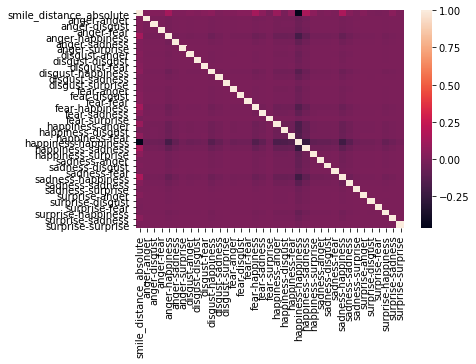

,smile_distance_absolute,anger-anger,anger-disgust,anger-fear,anger-happiness,anger-sadness,anger-surprise,disgust-anger,disgust-disgust,disgust-fear,disgust-happiness,disgust-sadness,disgust-surprise,fear-anger,fear-disgust,fear-fear,fear-happiness,fear-sadness,fear-surprise,happiness-anger,happiness-disgust,happiness-fear,happiness-happiness,happiness-sadness,happiness-surprise,sadness-anger,sadness-disgust,sadness-fear,sadness-happiness,sadness-sadness,sadness-surprise,surprise-anger,surprise-disgust,surprise-fear,surprise-happiness,surprise-sadness,surprise-surprise
smile_distance_absolute,1,0.0227925,0.0214585,0.0191114,0.13338,0.0102692,0.00883535,0.0239618,0.0127663,0.0294888,0.0505304,0.00248214,0.0149866,0.0167921,0.0339283,0.034236,0.136016,0.0471808,-0.0149226,0.0939518,-0.0148156,0.0585275,-0.462529,0.146116,0.0490183,-0.00411879,0.0110624,-0.00504202,0.159441,0.0239855,-8.39833e-05,0.0263181,-0.00916619,-0.0122513,-0.00817497,0.0406309,-0.00424985
anger-anger,0.0227925,1,-0.00622365,-0.00702641,-0.0223665,-0.00997132,-0.00459082,-0.00663688,-0.00530363,-0.00439484,-0.0151503,-0.00892633,-0.00350415,-0.00689895,-0.00546753,-0.00546753,-0.0170765,-0.0112486,-0.00374655,-0.0195407,-0.0188855,-0.0172424,-0.0614756,-0.0288593,-0.0107548,-0.00988067,-0.00978922,-0.00739599,-0.0247413,-0.0135348,-0.00562673,-0.00439484,-0.00459082,-0.00296082,-0.00862045,-0.00530363,-0.00264791
anger-disgust,0.0214585,-0.00622365,1,-0.00611465,-0.0194642,-0.00867742,-0.0039951,-0.00577566,-0.00461542,-0.00382455,-0.0131844,-0.00776803,-0.00304944,-0.00600372,-0.00475805,-0.00475805,-0.0148606,-0.00978895,-0.00326039,-0.0170051,-0.0164349,-0.015005,-0.0534984,-0.0251145,-0.00935921,-0.00859853,-0.00851894,-0.00643627,-0.0215308,-0.0117785,-0.00489659,-0.00382455,-0.0039951,-0.00257661,-0.00750184,-0.00461542,-0.00230431
anger-fear,0.0191114,-0.00702641,-0.00611465,1,-0.0219748,-0.00979669,-0.00451042,-0.00652064,-0.00521074,-0.00431787,-0.014885,-0.00877,-0.00344278,-0.00677812,-0.00537177,-0.00537177,-0.0167774,-0.0110516,-0.00368093,-0.0191985,-0.0185548,-0.0169405,-0.0603989,-0.0283539,-0.0105664,-0.00970762,-0.00961777,-0.00726645,-0.024308,-0.0132978,-0.00552819,-0.00431787,-0.00451042,-0.00290896,-0.00846948,-0.00521074,-0.00260154
anger-happiness,0.13338,-0.0223665,-0.0194642,-0.0219748,1,-0.0311849,-0.0143576,-0.0207565,-0.0165869,-0.0137447,-0.047382,-0.0279167,-0.0109591,-0.0215761,-0.0170994,-0.0170994,-0.053406,-0.0351795,-0.0117172,-0.0611127,-0.0590637,-0.053925,-0.192262,-0.0902563,-0.0336351,-0.0309013,-0.0306153,-0.0231306,-0.0773772,-0.0423296,-0.0175973,-0.0137447,-0.0143576,-0.00925982,-0.0269601,-0.0165869,-0.00828122
anger-sadness,0.0102692,-0.00997132,-0.00867742,-0.00979669,-0.0311849,1,-0.00640083,-0.00925358,-0.00739467,-0.00612757,-0.0211236,-0.0124457,-0.00488571,-0.00961897,-0.00762319,-0.00762319,-0.0238092,-0.0156835,-0.00522369,-0.027245,-0.0263315,-0.0240406,-0.0857133,-0.0402376,-0.014995,-0.0137763,-0.0136488,-0.010312,-0.0344959,-0.0188712,-0.00784516,-0.00612757,-0.00640083,-0.00412817,-0.0120192,-0.00739467,-0.00369189
anger-surprise,0.00883535,-0.00459082,-0.0039951,-0.00451042,-0.0143576,-0.00640083,1,-0.00426037,-0.00340452,-0.00282115,-0.00972536,-0.00573002,-0.00224939,-0.0044286,-0.00350973,-0.00350973,-0.0109618,-0.00722073,-0.002405,-0.0125437,-0.0121231,-0.0110683,-0.0394626,-0.0185255,-0.00690374,-0.00634263,-0.00628393,-0.00474766,-0.015882,-0.00868833,-0.00361193,-0.00282115,-0.00294695,-0.00190062,-0.00553367,-0.00340452,-0.00169976
disgust-anger,0.0239618,-0.00663688,-0.00577566,-0.00652064,-0.0207565,-0.00925358,-0.00426037,1,-0.00492187,-0.00407849,-0.0140598,-0.0082838,-0.00325191,-0.00640236,-0.00507397,-0.00507397,-0.0158473,-0.0104389,-0.00347687,-0.0181342,-0.0175262,-0.0160013,-0.0570505,-0.026782,-0.00998063,-0.00916945,-0.00908458,-0.00686362,-0.0229604,-0.0125606,-0.00522171,-0.00407849,-0.00426037,-0.0027477,-0.00799994,-0.00492187,-0.00245731
disgust-disgust,0.0127663,-0.005

                       cols       vif
0   smile_distance_absolute  1.325126
1               anger-anger  1.012968
2             anger-disgust  1.010211
3                anger-fear  1.011693
4           anger-happiness  1.171932
5             anger-sadness  1.017864
6            anger-surprise  1.004435
7             disgust-anger  1.011872
8           disgust-disgust  1.006374
9              disgust-fear  1.007732
10        disgust-happiness  1.058012
11          disgust-sadness  1.012573
12         disgust-surprise  1.003641
13               fear-anger  1.010800
14             fear-disgust  1.011267
15                fear-fear  1.011343
16           fear-happiness  1.129279
17             fear-sadness  1.036525
18            fear-surprise  1.000836
19          happiness-anger  1.115447
20        happiness-disgust  1.044216
21           happiness-fear  1.075085
22      happiness-happiness  1.032952
23        happiness-sadness  1.245468
24       happiness-surprise  1.035091
25          

In [846]:
analysis.test_features(shared_emotion_X, shared_emotion_Y, vif_thresh=10)

### Relative Satisfaction

In [850]:
shared_emotion = shared_set[["relative_satisfaction"]+demo_emotion]

In [851]:
shared_emotion['emotion_pairing'].value_counts()

happiness-happiness    1412
happiness-sadness       426
sadness-happiness       322
anger-happiness         267
happiness-anger         207
happiness-disgust       194
happiness-fear          163
fear-happiness          160
disgust-happiness       127
sadness-sadness         102
fear-sadness             71
happiness-surprise       65
anger-sadness            56
sadness-anger            55
sadness-disgust          54
disgust-sadness          45
surprise-happiness       42
sadness-fear             31
anger-anger              29
anger-fear               28
fear-anger               27
disgust-anger            25
anger-disgust            22
sadness-surprise         18
fear-disgust             17
fear-fear                17
surprise-sadness         16
disgust-disgust          16
surprise-disgust         12
anger-surprise           12
surprise-anger           11
disgust-fear             11
fear-surprise             8
disgust-surprise          7
surprise-fear             5
surprise-surprise   

In [852]:
shared_emotion = analysis.get_dummies(shared_emotion, 'emotion_pairing')

In [853]:
shared_emotion_X,shared_emotion_Y = get_x_y(shared_emotion, 'relative_satisfaction')

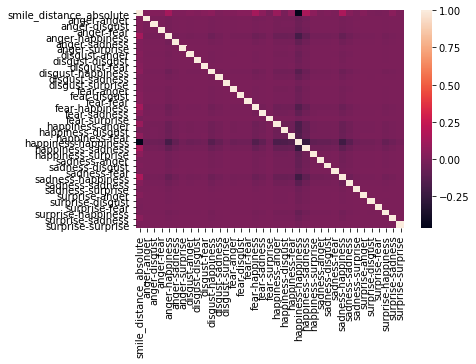

,smile_distance_absolute,anger-anger,anger-disgust,anger-fear,anger-happiness,anger-sadness,anger-surprise,disgust-anger,disgust-disgust,disgust-fear,disgust-happiness,disgust-sadness,disgust-surprise,fear-anger,fear-disgust,fear-fear,fear-happiness,fear-sadness,fear-surprise,happiness-anger,happiness-disgust,happiness-fear,happiness-happiness,happiness-sadness,happiness-surprise,sadness-anger,sadness-disgust,sadness-fear,sadness-happiness,sadness-sadness,sadness-surprise,surprise-anger,surprise-disgust,surprise-fear,surprise-happiness,surprise-sadness,surprise-surprise
smile_distance_absolute,1,0.0227925,0.0214585,0.0191114,0.13338,0.0102692,0.00883535,0.0239618,0.0127663,0.0294888,0.0505304,0.00248214,0.0149866,0.0167921,0.0339283,0.034236,0.136016,0.0471808,-0.0149226,0.0939518,-0.0148156,0.0585275,-0.462529,0.146116,0.0490183,-0.00411879,0.0110624,-0.00504202,0.159441,0.0239855,-8.39833e-05,0.0263181,-0.00916619,-0.0122513,-0.00817497,0.0406309,-0.00424985
anger-anger,0.0227925,1,-0.00622365,-0.00702641,-0.0223665,-0.00997132,-0.00459082,-0.00663688,-0.00530363,-0.00439484,-0.0151503,-0.00892633,-0.00350415,-0.00689895,-0.00546753,-0.00546753,-0.0170765,-0.0112486,-0.00374655,-0.0195407,-0.0188855,-0.0172424,-0.0614756,-0.0288593,-0.0107548,-0.00988067,-0.00978922,-0.00739599,-0.0247413,-0.0135348,-0.00562673,-0.00439484,-0.00459082,-0.00296082,-0.00862045,-0.00530363,-0.00264791
anger-disgust,0.0214585,-0.00622365,1,-0.00611465,-0.0194642,-0.00867742,-0.0039951,-0.00577566,-0.00461542,-0.00382455,-0.0131844,-0.00776803,-0.00304944,-0.00600372,-0.00475805,-0.00475805,-0.0148606,-0.00978895,-0.00326039,-0.0170051,-0.0164349,-0.015005,-0.0534984,-0.0251145,-0.00935921,-0.00859853,-0.00851894,-0.00643627,-0.0215308,-0.0117785,-0.00489659,-0.00382455,-0.0039951,-0.00257661,-0.00750184,-0.00461542,-0.00230431
anger-fear,0.0191114,-0.00702641,-0.00611465,1,-0.0219748,-0.00979669,-0.00451042,-0.00652064,-0.00521074,-0.00431787,-0.014885,-0.00877,-0.00344278,-0.00677812,-0.00537177,-0.00537177,-0.0167774,-0.0110516,-0.00368093,-0.0191985,-0.0185548,-0.0169405,-0.0603989,-0.0283539,-0.0105664,-0.00970762,-0.00961777,-0.00726645,-0.024308,-0.0132978,-0.00552819,-0.00431787,-0.00451042,-0.00290896,-0.00846948,-0.00521074,-0.00260154
anger-happiness,0.13338,-0.0223665,-0.0194642,-0.0219748,1,-0.0311849,-0.0143576,-0.0207565,-0.0165869,-0.0137447,-0.047382,-0.0279167,-0.0109591,-0.0215761,-0.0170994,-0.0170994,-0.053406,-0.0351795,-0.0117172,-0.0611127,-0.0590637,-0.053925,-0.192262,-0.0902563,-0.0336351,-0.0309013,-0.0306153,-0.0231306,-0.0773772,-0.0423296,-0.0175973,-0.0137447,-0.0143576,-0.00925982,-0.0269601,-0.0165869,-0.00828122
anger-sadness,0.0102692,-0.00997132,-0.00867742,-0.00979669,-0.0311849,1,-0.00640083,-0.00925358,-0.00739467,-0.00612757,-0.0211236,-0.0124457,-0.00488571,-0.00961897,-0.00762319,-0.00762319,-0.0238092,-0.0156835,-0.00522369,-0.027245,-0.0263315,-0.0240406,-0.0857133,-0.0402376,-0.014995,-0.0137763,-0.0136488,-0.010312,-0.0344959,-0.0188712,-0.00784516,-0.00612757,-0.00640083,-0.00412817,-0.0120192,-0.00739467,-0.00369189
anger-surprise,0.00883535,-0.00459082,-0.0039951,-0.00451042,-0.0143576,-0.00640083,1,-0.00426037,-0.00340452,-0.00282115,-0.00972536,-0.00573002,-0.00224939,-0.0044286,-0.00350973,-0.00350973,-0.0109618,-0.00722073,-0.002405,-0.0125437,-0.0121231,-0.0110683,-0.0394626,-0.0185255,-0.00690374,-0.00634263,-0.00628393,-0.00474766,-0.015882,-0.00868833,-0.00361193,-0.00282115,-0.00294695,-0.00190062,-0.00553367,-0.00340452,-0.00169976
disgust-anger,0.0239618,-0.00663688,-0.00577566,-0.00652064,-0.0207565,-0.00925358,-0.00426037,1,-0.00492187,-0.00407849,-0.0140598,-0.0082838,-0.00325191,-0.00640236,-0.00507397,-0.00507397,-0.0158473,-0.0104389,-0.00347687,-0.0181342,-0.0175262,-0.0160013,-0.0570505,-0.026782,-0.00998063,-0.00916945,-0.00908458,-0.00686362,-0.0229604,-0.0125606,-0.00522171,-0.00407849,-0.00426037,-0.0027477,-0.00799994,-0.00492187,-0.00245731
disgust-disgust,0.0127663,-0.005

                       cols       vif
0   smile_distance_absolute  1.325126
1               anger-anger  1.012968
2             anger-disgust  1.010211
3                anger-fear  1.011693
4           anger-happiness  1.171932
5             anger-sadness  1.017864
6            anger-surprise  1.004435
7             disgust-anger  1.011872
8           disgust-disgust  1.006374
9              disgust-fear  1.007732
10        disgust-happiness  1.058012
11          disgust-sadness  1.012573
12         disgust-surprise  1.003641
13               fear-anger  1.010800
14             fear-disgust  1.011267
15                fear-fear  1.011343
16           fear-happiness  1.129279
17             fear-sadness  1.036525
18            fear-surprise  1.000836
19          happiness-anger  1.115447
20        happiness-disgust  1.044216
21           happiness-fear  1.075085
22      happiness-happiness  1.032952
23        happiness-sadness  1.245468
24       happiness-surprise  1.035091
25          

In [854]:
analysis.test_features(shared_emotion_X, shared_emotion_Y, vif_thresh=10)

In [864]:
from pygam import LogisticGAM
gam = LogisticGAM().fit(full_emotion_X, full_emotion_Y)


/Users/lynraybarends/anaconda3/lib/python3.6/site-packages/pygam/pygam.py:1522: RuntimeWarning: invalid value encountered in double_scalars
  r2['McFadden'] = full_ll/null_ll
/Users/lynraybarends/anaconda3/lib/python3.6/site-packages/pygam/pygam.py:1523: RuntimeWarning: invalid value encountered in double_scalars
  r2['McFadden_adj'] = 1. - (full_ll - self.statistics_['edof'])/null_ll


In [551]:
from pygam import LogisticGAM
gam = LogisticGAM().fit(full_emotion_X, full_emotion_Y)


/Users/lynraybarends/anaconda3/lib/python3.6/site-packages/pygam/pygam.py:1522: RuntimeWarning: invalid value encountered in double_scalars
  r2['McFadden'] = full_ll/null_ll
/Users/lynraybarends/anaconda3/lib/python3.6/site-packages/pygam/pygam.py:1523: RuntimeWarning: invalid value encountered in double_scalars
  r2['McFadden_adj'] = 1. - (full_ll - self.statistics_['edof'])/null_ll


In [865]:
gam.summary()

LogisticGAM                                                                                               
=============================================== ==========================================================
Distribution:                      BinomialDist Effective DoF:                                     31.8998
Link Function:                        LogitLink Log Likelihood:                                       -inf
Number of Samples:                         5398 AIC:                                                   inf
                                                AICc:                                                  inf
                                                UBRE:                                               2.1148
                                                Scale:                                                 1.0
                                                Pseudo R-Squared:                                   0.0069
Feature Function   Data Type      Num